![T-20 Cricket](https://github.com/Shamsvi/CMSE-830/raw/main/MidtermPorject/t-20%20cricket.png)


Cricket has seen growing popularity across the globe, especially the T-20 format, which attracts a massive fan-base. This data provides the relevant information of all T-20 World Cup matches played from the first edition held in 2007, till the latest one of 2024. This could be used to predict results of upcoming matches, draw meaningful insights from data such as which all factors majorly contribute to the success of any team.

Our dataset is primarily sourced from Kaggle, a hub of diverse and high-quality data. It’s packed with fascinating cricketing stats and insights, allowing us to analyze and predict the thrilling dynamics of the Men’s T20 World Cup.

Additionally, we’ve manually compiled data on team captains spanning the years 2007 to 2024, enriching our exploration of leadership patterns and their impact on team performance.

Here’s a closer look at the data that powers our analysis:

1. All T20 World Cup Matches Results:

This dataset captures the essence of every match contested in all World Cup editions. Here’s what it includes:

- Team1: One of the teams in the match.
- Team2: The other team in the match.
- Winner: The winner of the contest. If it’s a tie, it says "tied", and for abandoned matches, it says "no result".
- Margin: The victory margin, either in runs or wickets.
- Ground: Where the match was played.
- Match Date: When the match was played.
- T-20 Int Match: The international match number for T20 cricket.

2. All T20 World Cup Players List:

Ever wondered who suited up for each World Cup edition? This dataset gives you:

- Team: The name of the participating country.
- Year: The year they participated.
- Player Name: Names of players representing their teams.

3. WC Final Dataset:

This is the ultimate cricket dataset, with 16 attributes combining match results with advanced stats for accurate predictions. Highlights include:

- Teams and Winners: Team1, Team2, and match winners.
- Player Rankings: Average batting and bowling rankings of both teams, derived from ICC rankings.
- Historical Stats: Total World Cup participations and wins for each team.
- Win Percentages: Team1’s win percentage over Team2.
- Margin of Victory: Either in runs or wickets.
- Web-Scraped Data: Rankings scraped from reliable ICC sources one day before matches.

4. All Captains (2007-2024):

A manual compilation of all captains leading their teams in World Cups from 2007 to 2024.

## Refrences
- Men’s T20 CWC Dataset 2007-2024. (2024, September 17). Kaggle. https://www.kaggle.com/datasets/kamalisrani/mens-t20-cwc-dataset-2007-2004


### Importing Necessary Libraries

In [6]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import streamlit as st
import plotly.express as px
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler


### Loading The Datasets

In [8]:
matches_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/all_t20_world_cup_matches_results.csv'
players_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/all_t20_world_cup_players_list.csv'
final_dataset_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/wc_final_dataset.csv'
captains_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/all_captains.csv'
cricket_legends_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/cricket_legends.csv'
updated_wc_final_data_df_url = 'https://raw.githubusercontent.com/Shamsvi/Streamlit_Mens_T-20_Cricket_WorldCup_2007-2024/main/updated_wc_final_data_df.csv'


# Load the datasets from the URLs
all_matches_data_df = pd.read_csv(matches_url)
players_df = pd.read_csv(players_url)
wc_final_data_df = pd.read_csv(final_dataset_url)
captains_df = pd.read_csv(captains_url)
cricket_legends_df = pd.read_csv(cricket_legends_url)
updated_wc_final_data_df = pd.read_csv(updated_wc_final_data_df_url)

In [9]:
print(players_df)

             Team  Year           Player Name
0     Afghanistan  2010         Nawroz Mangal
1     Afghanistan  2010         Asghar Afghan
2     Afghanistan  2010           Karim Sadiq
3     Afghanistan  2010      Mohammad Shahzad
4     Afghanistan  2010       Noor Ali Zadran
...           ...   ...                   ...
1975     Zimbabwe  2022         Sikandar Raza
1976     Zimbabwe  2022        Tendai Chatara
1977     Zimbabwe  2022  Wellington Masakadza
1978     Zimbabwe  2022   Blessing Muzarabani
1979     Zimbabwe  2022       Richard Ngarava

[1980 rows x 3 columns]


In [10]:
print(wc_final_data_df)

            Team1      Team2        Winner     Margin        Ground  \
0           India   Pakistan         India     5 runs  Johannesburg   
1       Australia      India         India    15 runs        Durban   
2     New Zealand   Pakistan      Pakistan  6 wickets     Cape Town   
3    South Africa      India         India    37 runs        Durban   
4      Bangladesh   Pakistan      Pakistan  4 wickets     Cape Town   
..            ...        ...           ...        ...           ...   
312   Afghanistan     Uganda   Afghanistan   125 runs    Providence   
313  South Africa  Sri Lanka  South Africa  6 wickets      New York   
314       Namibia       Oman          tied          -    Bridgetown   
315   West Indies        PNG   West Indies  5 wickets    Providence   
316           USA     Canada           USA  7 wickets        Dallas   

     Match Date T-20 Int Match  Team1 Avg Batting Ranking  \
0    2007/09/24      T20I # 46                      67.13   
1    2007/09/22      T20I

In [11]:
print(captains_df)

                     Team       Player Name  Year  Unnamed: 3  Unnamed: 4  \
0                   India          MS Dhoni  2007         NaN         NaN   
1                Pakistan      Shoaib Malik  2007         NaN         NaN   
2               Australia     Ricky Ponting  2007         NaN         NaN   
3            South Africa      Graeme Smith  2007         NaN         NaN   
4                 England  Paul Collingwood  2007         NaN         NaN   
..                    ...               ...   ...         ...         ...   
211  United Arab Emirates                 -  2024         NaN         NaN   
212                   PNG   Assadollah Vala  2024         NaN         NaN   
213                Canada    Saad Bin Zafar  2024         NaN         NaN   
214                Uganda      Brian Masaba  2024         NaN         NaN   
215               Namibia   Gerhard Erasmus  2024         NaN         NaN   

     Unnamed: 5  Unnamed: 6  Unnamed: 7  
0           NaN         NaN      

### IDA 

In [13]:
import re
import pandas as pd

# Define functions once
def extract_numeric_value(value):
    match = re.search(r'\d+', str(value))
    return int(match.group()) if match else None

def extract_t20_int_match(value):
    match = re.search(r'# (\d+)', str(value))  # Extract the number after the hash symbol
    return int(match.group(1)) if match else None

# Apply transformations to the wc_final_data_df
wc_final_data_df['T-20 Int Match'] = wc_final_data_df['T-20 Int Match'].apply(extract_t20_int_match)

# Convert 'Match Date' to datetime and extract year, month, day
wc_final_data_df['Match Date'] = pd.to_datetime(wc_final_data_df['Match Date'], format='%Y/%m/%d')
wc_final_data_df['Match Year'] = wc_final_data_df['Match Date'].dt.year
wc_final_data_df['Match Month'] = wc_final_data_df['Match Date'].dt.month
wc_final_data_df['Match Day'] = wc_final_data_df['Match Date'].dt.day

# Drop the original 'Match Date' column
wc_final_data_df = wc_final_data_df.drop(columns=['Match Date'])

# Display the first few rows of the updated dataframe
print(wc_final_data_df.head())

# Save the updated dataframe
wc_final_data_df.to_csv('updated_wc_final_data_df.csv', index=False)


          Team1     Team2    Winner     Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5 runs  Johannesburg              46   
1     Australia     India     India    15 runs        Durban              45   
2   New Zealand  Pakistan  Pakistan  6 wickets     Cape Town              44   
3  South Africa     India     India    37 runs        Durban              43   
4    Bangladesh  Pakistan  Pakistan  4 wickets     Cape Town              42   

   Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
0                      67.13                      65.87   
1                      66.54                      70.20   
2                      66.07                      67.20   
3                      69.53                      75.67   
4                      75.53                      69.67   

   Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  \
0                      80.67                      63.40   
1                      58.77                  

# 🐻🐻

This code preprocesses the cricket match dataset (wc_final_data_df) by extracting and restructuring key information. It uses the extract_t20_int_match function to parse and extract numeric match identifiers from the T-20 Int Match column. The Match Date column is converted into a standardized datetime format, and its components—year, month, and day—are extracted into separate columns for granular analysis. After extracting these details, the original Match Date column is dropped to avoid redundancy. The updated dataset is then displayed and saved as a CSV file (updated_wc_final_data_df.csv) for further use, ensuring the data is clean and well-structured for subsequent analysis.

### Missingness

In [15]:
missing_values_all_matches = all_matches_data_df.isnull().sum()
missing_values_wc_final_dataset = wc_final_data_df.isnull().sum()
missing_values_players = players_df.isnull().sum()
missing_values_captains = captains_df.isnull().sum()


# Print the missing values for each dataset
print("Missing values in all_matches_data_df:\n", missing_values_all_matches)
print("Missing values in final_dataset_df:\n", missing_values_wc_final_dataset)
print("Missing values in players_df:\n", missing_values_players)
print("Missing values in captains_df:\n", missing_values_players)

Missing values in all_matches_data_df:
 Team1             0
Team2             0
Winner            0
Margin            0
Ground            0
Match Date        0
T-20 Int Match    0
dtype: int64
Missing values in final_dataset_df:
 Team1                           0
Team2                           0
Winner                          0
Margin                          0
Ground                          0
T-20 Int Match                  0
Team1 Avg Batting Ranking       0
Team2 Avg Batting Ranking       0
Team1 Avg Bowling Ranking       0
Team2 Avg Bowling Ranking       0
Team1 Total WCs participated    0
Team1 Total WCs won             0
Team2 Total WCs participated    0
Team2 Total WCs won             0
Team1 win % over Team2          0
Match Year                      0
Match Month                     0
Match Day                       0
dtype: int64
Missing values in players_df:
 Team           0
Year           0
Player Name    0
dtype: int64
Missing values in captains_df:
 Team           0
Y

No Missingness Found

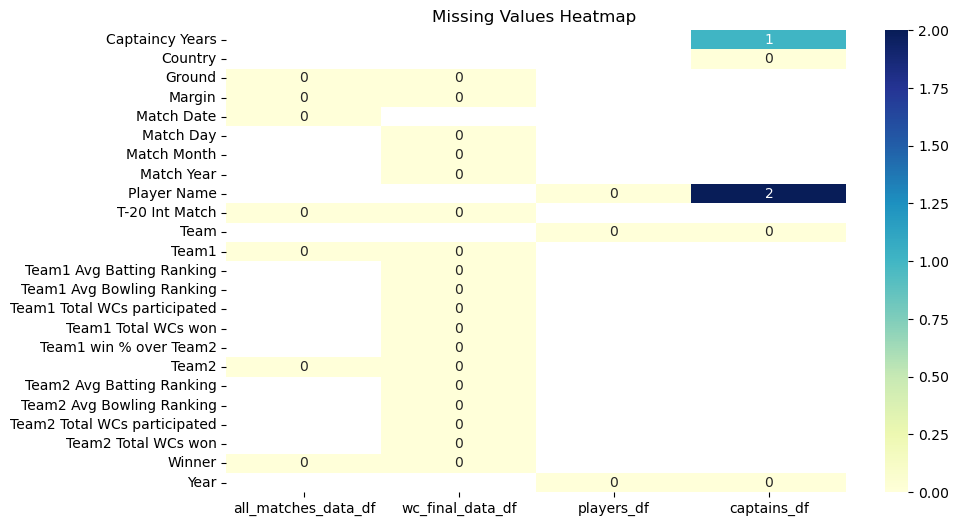

In [16]:
%matplotlib inline

# Assuming your missing values have already been calculated
missing_values_captains = pd.Series([2, 0, 0, 1, 0], index=['Player Name', 'Team', 'Year', 'Captaincy Years', 'Country'])

# Combine the missing values into a DataFrame for a heatmap, including captains_df
missing_data_updated = pd.DataFrame({
    'all_matches_data_df': missing_values_all_matches,
    'wc_final_data_df': missing_values_wc_final_dataset,
    'players_df': missing_values_players,
    'captains_df': missing_values_captains
})

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data_updated, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Missing Values Heatmap ')
plt.show()

# 🐻🐻

This code visualizes missing data across multiple datasets using a heatmap for easy interpretation. It starts by calculating the missing values for the captains_df dataset, represented as a Series with counts of missing entries for key columns like Player Name, Team, Year, Captaincy Years, and Country. These missing values are then combined into a DataFrame alongside missing values from other datasets (all_matches_data_df, wc_final_data_df, players_df, and captains_df). A heatmap is generated using Seaborn to display the extent of missing data, with annotations for the number of missing values and a color gradient (YlGnBu) to highlight patterns. This provides a clear overview of the completeness of each dataset and aids in identifying columns requiring attention for data cleaning or imputation.

In [17]:
# Display rows in captains_df that contain missing values
missing_captains_rows = captains_df[captains_df.isnull().any(axis=1)]

# Show the rows with missing values
print(missing_captains_rows)


                     Team       Player Name  Year  Unnamed: 3  Unnamed: 4  \
0                   India          MS Dhoni  2007         NaN         NaN   
1                Pakistan      Shoaib Malik  2007         NaN         NaN   
2               Australia     Ricky Ponting  2007         NaN         NaN   
3            South Africa      Graeme Smith  2007         NaN         NaN   
4                 England  Paul Collingwood  2007         NaN         NaN   
..                    ...               ...   ...         ...         ...   
211  United Arab Emirates                 -  2024         NaN         NaN   
212                   PNG   Assadollah Vala  2024         NaN         NaN   
213                Canada    Saad Bin Zafar  2024         NaN         NaN   
214                Uganda      Brian Masaba  2024         NaN         NaN   
215               Namibia   Gerhard Erasmus  2024         NaN         NaN   

     Unnamed: 5  Unnamed: 6  Unnamed: 7  
0           NaN         NaN      

This code identifies and displays rows in the captains_df dataset that contain missing values. By using the isnull().any(axis=1) method, it filters the dataset to include only rows where at least one column has a missing (NaN) value. These rows are stored in the missing_captains_rows variable and then printed to provide a clear view of which records have incomplete data. This step is essential for targeted data cleaning, as it highlights the specific rows requiring imputation or further investigation.

### Data cleaning

In [19]:
# Define functions 
def extract_numeric_value(value):
    match = re.search(r'\d+', str(value))
    return int(match.group()) if match else None
def extract_t20_int_match(value):
    match = re.search(r'# (\d+)', str(value))  # Extract the number after the hash symbol
    return int(match.group(1)) if match else None

# Margins Column into Margb (runs) and Margin (Wickets)
def extract_runs_correct(margin):
    if isinstance(margin, str) and 'runs' in margin:
        return float(margin.split()[0])  # Extract the number for runs
    return None

def extract_wickets_correct(margin):
    if isinstance(margin, str) and 'wickets' in margin:
        return float(margin.split()[0])  # Extract the number for wickets
    return None

# 
wc_final_data_df['Margin (Runs)'] = wc_final_data_df['Margin'].apply(extract_runs_correct)
wc_final_data_df['Margin (Wickets)'] = wc_final_data_df['Margin'].apply(extract_wickets_correct)

# Display the updated dataframe with the new columns
wc_final_data_df[['Margin', 'Margin (Runs)', 'Margin (Wickets)']].head()

print(wc_final_data_df.head())

# Save the updated dataframe
wc_final_data_df.to_csv('updated_wc_final_data_df.csv', index=False)


          Team1     Team2    Winner     Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5 runs  Johannesburg              46   
1     Australia     India     India    15 runs        Durban              45   
2   New Zealand  Pakistan  Pakistan  6 wickets     Cape Town              44   
3  South Africa     India     India    37 runs        Durban              43   
4    Bangladesh  Pakistan  Pakistan  4 wickets     Cape Town              42   

   Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
0                      67.13                      65.87   
1                      66.54                      70.20   
2                      66.07                      67.20   
3                      69.53                      75.67   
4                      75.53                      69.67   

   Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  \
0                      80.67                      63.40   
1                      58.77                  

# 🐻🐻

This code processes the Margin column in a cricket match dataset to extract numerical values for match-winning margins, separating them into Margin (Runs) and Margin (Wickets) columns. The extract_runs_correct function identifies margins described in terms of runs and extracts the numerical value, while the extract_wickets_correct function does the same for margins described in terms of wickets. Additionally, the extract_numeric_value and extract_t20_int_match functions are utilities for extracting numeric values from text strings and specific match numbers from hashtags, respectively. After applying these functions to the dataset, the updated DataFrame, now containing the new columns, is displayed and saved as a CSV file named updated_wc_final_data_df.csv for future use. This ensures the dataset is ready for further analysis with clearly defined margin metrics.

In [92]:
# Drop the unnamed columns from captains_df
captains_df_cleaned = captains_df.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'])

# Display the cleaned DataFrame
print(captains_df_cleaned)

                     Team       Player Name  Year
0                   India          MS Dhoni  2007
1                Pakistan      Shoaib Malik  2007
2               Australia     Ricky Ponting  2007
3            South Africa      Graeme Smith  2007
4                 England  Paul Collingwood  2007
..                    ...               ...   ...
211  United Arab Emirates                 -  2024
212                   PNG   Assadollah Vala  2024
213                Canada    Saad Bin Zafar  2024
214                Uganda      Brian Masaba  2024
215               Namibia   Gerhard Erasmus  2024

[216 rows x 3 columns]


# 🐻🐻

This code cleans the captains_df dataset by removing unnecessary unnamed columns ('Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7') that may have been introduced during data import (e.g., from a CSV file with extra blank columns). The drop method is used to remove these columns, and the cleaned dataset is stored in captains_df_cleaned. The cleaned DataFrame is then displayed using print to verify the removal of these redundant columns, ensuring the dataset is tidy and focused on relevant information.

### Missingness #2

In [24]:
missing_values = wc_final_data_df.isnull().sum()

# Display the missing values in each column
missing_values

Team1                             0
Team2                             0
Winner                            0
Margin                            0
Ground                            0
T-20 Int Match                    0
Team1 Avg Batting Ranking         0
Team2 Avg Batting Ranking         0
Team1 Avg Bowling Ranking         0
Team2 Avg Bowling Ranking         0
Team1 Total WCs participated      0
Team1 Total WCs won               0
Team2 Total WCs participated      0
Team2 Total WCs won               0
Team1 win % over Team2            0
Match Year                        0
Match Month                       0
Match Day                         0
Margin (Runs)                   166
Margin (Wickets)                169
dtype: int64

# 🐻🐻


The dataset shows missing values in the Margin (Runs) (166 missing) and Margin (Wickets) (169 missing) columns. These values are likely missing because matches were decided by the other metric (e.g., if Margin (Runs) is missing, the match was likely won by wickets, and vice versa). This reflects structured missingness, where the absence of data is tied to the match's outcome type. All other columns have complete data, ensuring essential match, team, and performance statistics are intact.

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(wc_final_data_df.isnull(), cmap="YlGnBu", cbar=True, yticklabels=False)
plt.title('Missingness Heatmap for the Entire Dataset')
plt.show()

# 🐻🐻

This code generates a heatmap to visualize missing values in the wc_final_data_df dataset. Using Seaborn's heatmap function, it highlights the presence of missing data (NaN values) across all columns. The isnull() method identifies missing values in the dataset, and the heatmap is styled with the "YlGnBu" colormap to enhance readability. The figure size is set to (12, 8) for better clarity, and the yticklabels are disabled to simplify the plot. The heatmap, titled "Missingness Heatmap for the Entire Dataset," provides a clear overview of where missing data exists, helping to identify patterns or problematic columns that require data cleaning.

In [27]:
# Checking the correlation between missing values for each column
missing_correlation = wc_final_data_df.isnull().corr()

# Display the correlation matrix for missingness
missing_correlation


Team1  Team2  Winner  Margin  Ground  \
Team1                           NaN    NaN     NaN     NaN     NaN   
Team2                           NaN    NaN     NaN     NaN     NaN   
Winner                          NaN    NaN     NaN     NaN     NaN   
Margin                          NaN    NaN     NaN     NaN     NaN   
Ground                          NaN    NaN     NaN     NaN     NaN   
T-20 Int Match                  NaN    NaN     NaN     NaN     NaN   
Team1 Avg Batting Ranking       NaN    NaN     NaN     NaN     NaN   
Team2 Avg Batting Ranking       NaN    NaN     NaN     NaN     NaN   
Team1 Avg Bowling Ranking       NaN    NaN     NaN     NaN     NaN   
Team2 Avg Bowling Ranking       NaN    NaN     NaN     NaN     NaN   
Team1 Total WCs participated    NaN    NaN     NaN     NaN     NaN   
Team1 Total WCs won             NaN    NaN     NaN     NaN     NaN   
Team2 Total WCs participated    NaN    NaN     NaN     NaN     NaN   
Team2 Total WCs won             NaN    NaN     NaN     NaN     NaN   
Team1 win % over Team2          NaN    NaN     NaN     NaN     NaN   
Match Year                      NaN    NaN     NaN     NaN     NaN   
Match Month                     NaN    NaN     NaN     NaN     NaN   
Match Day                       NaN    NaN     NaN     NaN     NaN   
Margin (Runs)                   NaN    NaN     NaN     NaN     NaN   
Margin (Wickets)                NaN    NaN     NaN     NaN     NaN   

                              T-20 Int Match  Team1 Avg Batting Ranking  \
Team1                                    NaN                        NaN   
Team2                                    NaN                        NaN   
Winner                                   NaN                        NaN   
Margin                                   NaN                        NaN   
Ground                                   NaN                        NaN   
T-20 Int Match                           NaN                        NaN   
Team1 Avg Batting Ranking                NaN                        NaN   
Team2 Avg Batting Ranking                NaN                        NaN   
Team1 Avg Bowling Ranking                NaN                        NaN   
Team2 Avg Bowling Ranking                NaN                        NaN   
Team1 Total WCs participated             NaN                        NaN   
Team1 Total WCs won                      NaN                        NaN   
Team2 Total WCs participated             NaN                        NaN   
Team2 Total WCs won                      NaN                        NaN   
Team1 win % over Team2                   NaN                        NaN   
Match Year                               NaN                        NaN   
Match Month                              NaN                        NaN   
Match Day                                NaN                        NaN   
Margin (Runs)                            NaN                        NaN   
Margin (Wickets)                         NaN                        NaN   

                              Team2 Avg Batting Ranking  \
Team1                                               NaN   
Team2                                               NaN   
Winner                                              NaN   
Margin                                              NaN   
Ground                                              NaN   
T-20 Int Match                                      NaN   
Team1 Avg Batting Ranking                           NaN   
Team2 Avg Batting Ranking                           NaN   
Team1 Avg Bowling Ranking                           NaN   
Team2 Avg Bowling Ranking                           NaN   
Team1 Total WCs participated                        NaN   
Team1 Total WCs won                                 NaN   
Team2 Total WCs participated                        NaN   
Team2 Total WCs won                                 NaN   
Team1 win % over Team2                              NaN   
Match Year                             

# 🐻🐻

The missingness correlation matrix for the dataset shows that the columns Margin (runs) and Margin (wickets) are highly inversely correlated, which suggests that the missing values in these columns are likely structurally related—when one is present, the other is absent. This points to a Missing at Random (MAR) pattern, where the missingness is dependent on whether the match margin was recorded as runs or wickets. Hence, we will replace the NaN values with 0

In [86]:
# Replace missing values with 0, updating the original DataFrame
wc_final_data_df['Margin (Runs)'] = wc_final_data_df['Margin (Runs)'].fillna(0)
wc_final_data_df['Margin (Wickets)'] = wc_final_data_df['Margin (Wickets)'].fillna(0)


In [133]:
wc_final_data_df['Batting Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Batting Ranking'] - wc_final_data_df['Team2 Avg Batting Ranking'])
wc_final_data_df['Bowling Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Bowling Ranking'] - wc_final_data_df['Team2 Avg Bowling Ranking'])

print("wc_final_data_df with new features:\n", wc_final_data_df.head())
wc_final_data_df.to_csv('updated_wc_final_data_df.csv', index=False)

# Summary statistics for both datasets
matches_summary = all_matches_data_df.describe()
final_dataset_summary = wc_final_data_df.describe()
print("Summary statistics for matches_results_df:\n", matches_summary)
print("Summary statistics for final_dataset_df:\n", final_dataset_summary)

if 'Team1 Avg Batting Ranking' in wc_final_data_df.columns and 'Team2 Avg Batting Ranking' in wc_final_data_df.columns:
    wc_final_data_df['Batting Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Batting Ranking'] - wc_final_data_df['Team2 Avg Batting Ranking'])

if 'Team1 Avg Bowling Ranking' in wc_final_data_df.columns and 'Team2 Avg Bowling Ranking' in wc_final_data_df.columns:
    wc_final_data_df['Bowling Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Bowling Ranking'] - wc_final_data_df['Team2 Avg Bowling Ranking'])


wc_final_data_df with new features:
           Team1     Team2    Winner     Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5 runs  Johannesburg              46   
1     Australia     India     India    15 runs        Durban              45   
2   New Zealand  Pakistan  Pakistan  6 wickets     Cape Town              44   
3  South Africa     India     India    37 runs        Durban              43   
4    Bangladesh  Pakistan  Pakistan  4 wickets     Cape Town              42   

   Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
0                      67.13                      65.87   
1                      66.54                      70.20   
2                      66.07                      67.20   
3                      69.53                      75.67   
4                      75.53                      69.67   

   Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  ...  Match Year  \
0                      80.67                      6

# 🐻🐻

This code enhances the wc_final_data_df dataset by creating two new features: Batting Ranking Difference and Bowling Ranking Difference. These features represent the absolute differences between the average batting and bowling rankings of Team1 and Team2, providing insights into the disparity between competing teams. The updated dataset is displayed and saved as a CSV file (updated_wc_final_data_df.csv) for further use.

Additionally, summary statistics for both all_matches_data_df and wc_final_data_df are computed and displayed using the describe() method. This provides an overview of numerical data distributions, such as mean, median, and standard deviation, aiding in exploratory data analysis.

Finally, conditional checks ensure the required columns exist before creating the new features, adding robustness to the code. This preprocessing step makes the dataset more informative and ready for analysis by including key metrics that reflect team performance differences.

### EDA

In [33]:
# Bar Plot 1: Distribution of Match Margin
fig_margin = px.histogram(
    wc_final_data_df, 
    x='Margin', 
    nbins=20, 
    title='Distribution of Match Margin',
    labels={'Margin': 'Margin', 'count': 'Frequency'},
    template='plotly_white'
)
fig_margin.update_traces(marker_line_color='black', marker_line_width=1.5)
fig_margin.update_layout(
    xaxis_title='Margin',
    yaxis_title='Frequency',
    width=600,  
    height=400
)
# Display the first plot
fig_margin.show()

# Bar Plot 2: Distribution of Team1 Avg Batting Ranking 
fig_batting_ranking = px.histogram(
    wc_final_data_df, 
    x='Team1 Avg Batting Ranking', 
    nbins=20, 
    title='Distribution of Team1 Avg Batting Ranking',
    labels={'Team1 Avg Batting Ranking': 'Batting Ranking', 'count': 'Frequency'},
    template='plotly_white'
)
fig_batting_ranking.update_traces(marker_line_color='black', marker_line_width=1.5)
fig_batting_ranking.update_layout(
    xaxis_title='Batting Ranking',
    yaxis_title='Frequency',
    width=600,  
    height=400
)
# Display the second plot
fig_batting_ranking.show()

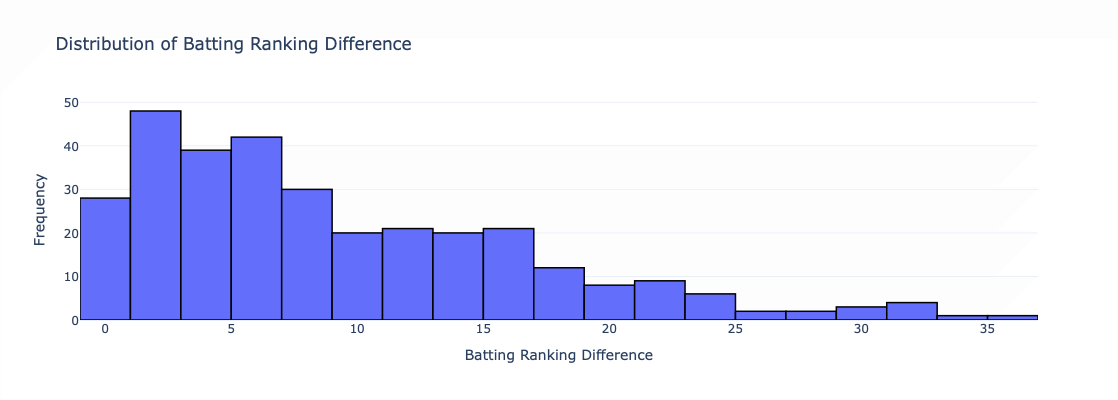

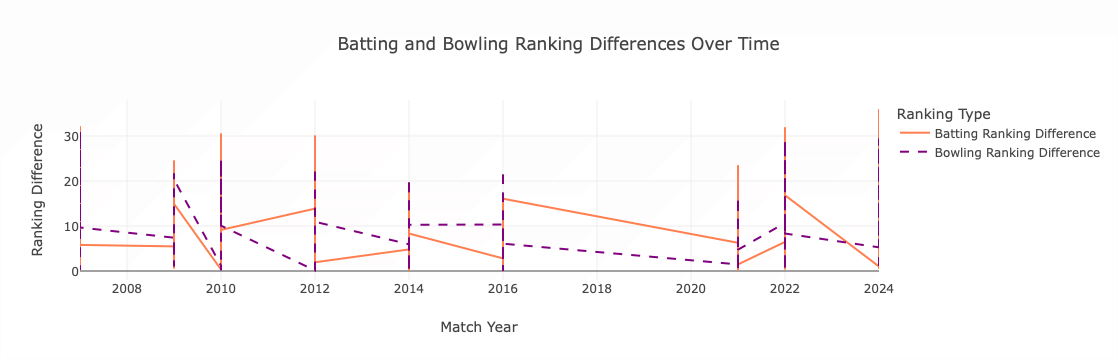

In [34]:
fig_batting_ranking_diff = px.histogram(
    wc_final_data_df, 
    x='Batting Ranking Difference', 
    nbins=20, 
    title='Distribution of Batting Ranking Difference',
    labels={'Batting Ranking Difference': 'Batting Ranking Difference', 'count': 'Frequency'},
    template='plotly_white'
)
fig_batting_ranking_diff.update_traces(marker_line_color='black', marker_line_width=1.5)
fig_batting_ranking_diff.update_layout(
    xaxis_title='Batting Ranking Difference',
    yaxis_title='Frequency',
    width=600,  
    height=400
)
# Display the first plot
fig_batting_ranking_diff.show()

# Plot 2: Distribution of Bowling Ranking Difference
fig_bowling_ranking_diff = px.histogram(
    wc_final_data_df, 
    x='Bowling Ranking Difference', 
    nbins=20, 
    title='Distribution of Bowling Ranking Difference',
    labels={'Bowling Ranking Difference': 'Bowling Ranking Difference', 'count': 'Frequency'},
    template='plotly_white'
)
fig_bowling_ranking_diff.update_traces(marker_line_color='black', marker_line_width=1.5)
fig_bowling_ranking_diff.update_layout(
    xaxis_title='Bowling Ranking Difference',
    yaxis_title='Frequency',
    width=600,  
    height=400
)
# Display the second plot
fig_bowling_ranking_diff.show()

# Line plot: Batting and Bowling Ranking Differences Over Time
fig_line = go.Figure()

# Batting Ranking Difference line
fig_line.add_trace(go.Scatter(
    x=wc_final_data_df['Match Year'],
    y=wc_final_data_df['Batting Ranking Difference'],
    mode='lines',
    name='Batting Ranking Difference',
    line=dict(color='coral'),
    hovertext=wc_final_data_df.apply(lambda row: f"Team 1: {row['Team1']}<br>Team 2: {row['Team2']}", axis=1),  # Adding team names in hover text
    hoverinfo='text+y'
))

# Bowling Ranking Difference line
fig_line.add_trace(go.Scatter(
    x=wc_final_data_df['Match Year'],
    y=wc_final_data_df['Bowling Ranking Difference'],
    mode='lines',
    name='Bowling Ranking Difference',
    line=dict(color='purple', dash='dash'),
    hovertext=wc_final_data_df.apply(lambda row: f"Team 1: {row['Team1']}<br>Team 2: {row['Team2']}", axis=1),  # Adding team names in hover text
    hoverinfo='text+y'
))

# Update layout for line plot
fig_line.update_layout(
    title='Batting and Bowling Ranking Differences Over Time',
    xaxis_title='Match Year',
    yaxis_title='Ranking Difference',
    legend_title='Ranking Type',
    hovermode='x unified'
)

# Display the line plot
fig_line.show()

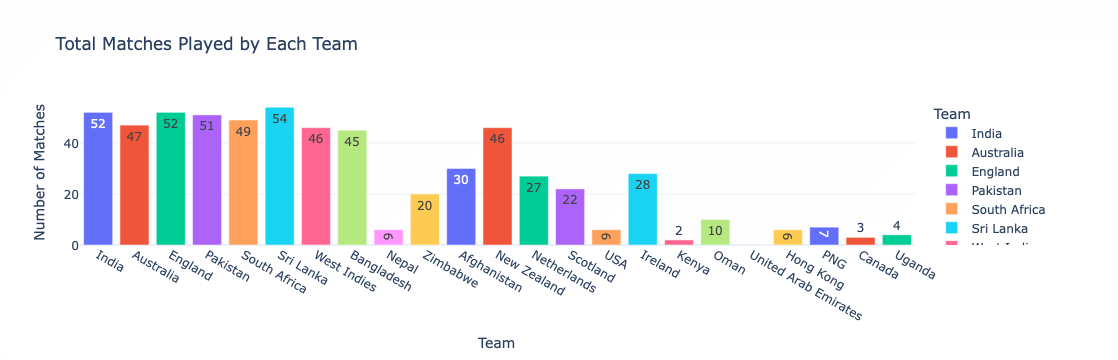

In [35]:
import pandas as pd
import plotly.express as px

# Load the datasets
final_dataset_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/wc_final_dataset.csv'
matches_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/all_t20_world_cup_matches_results.csv'

wc_final_data_df = pd.read_csv(final_dataset_url)
all_matches_data_df = pd.read_csv(matches_url)

# Bar Plot: Total Matches Played by Each Team
team1_counts = wc_final_data_df['Team1'].value_counts()
team2_counts = wc_final_data_df['Team2'].value_counts()

# Create dataframes for matches played by Team1 and Team2
total_matches_team1 = pd.DataFrame({'Team': team1_counts.index, 'Matches': team1_counts.values})
total_matches_team2 = pd.DataFrame({'Team': team2_counts.index, 'Matches': team2_counts.values})

# Concatenate the dataframes
total_matches = pd.concat([total_matches_team1, total_matches_team2], ignore_index=True)
total_matches = total_matches.groupby('Team', as_index=False).sum()

# GEOSPATIAL: Correct Team to Country Mapping
team_country_mapping = {
    'India': 'India',
    'Australia': 'Australia',
    'England': 'United Kingdom',
    'Pakistan': 'Pakistan',
    'South Africa': 'South Africa',
    'Sri Lanka': 'Sri Lanka',
    'West Indies': 'Jamaica',  # Using Jamaica to represent West Indies
    'Bangladesh': 'Bangladesh',
    'Nepal': 'Nepal',
    'Zimbabwe': 'Zimbabwe',
    'Afghanistan': 'Afghanistan',
    'New Zealand': 'New Zealand',
    'Netherlands': 'Netherlands',
    'Scotland': 'United Kingdom',  # Mapping Scotland to United Kingdom
    'USA': 'United States of America',  # Correct USA name for Plotly
    'Ireland': 'Ireland',
    'Kenya': 'Kenya',
    'Oman': 'Oman',
    'United Arab Emirates': 'United Arab Emirates',
    'Hong Kong': 'Hong Kong',
    'PNG': 'Papua New Guinea',  # Correct PNG name for Plotly
    'Canada': 'Canada',
    'Uganda': 'Uganda'
}

# Ensure all countries are included, even those with zero matches
all_countries = pd.DataFrame({'Team': list(team_country_mapping.keys())})
total_matches = pd.merge(all_countries, total_matches, on='Team', how='left').fillna(0)

# Map teams to their respective countries
total_matches['Country'] = total_matches['Team'].map(lambda x: team_country_mapping.get(x, 'Unknown'))

# Bar Plot: Total Matches Played by Each Team
fig_total_matches = px.bar(
    total_matches, 
    x='Team', 
    y='Matches', 
    color='Team',  
    title='Total Matches Played by Each Team',
    labels={'Matches': 'Number of Matches', 'Team': 'Team'},
    text='Matches',
    template='plotly_white',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Show the bar plot
fig_total_matches.show()

# Create a choropleth map for geospatial distribution of matches
fig_geo_total_matches = px.choropleth(
    total_matches,
    locations='Country',  
    locationmode='country names',  
    color='Matches',  
    hover_name='Country',  
    hover_data=['Matches'],  
    title='Total Matches Played by Each Team',
    color_continuous_scale=px.colors.sequential.Plasma  # Using Plasma scale for color
)

# Customize the layout for the choropleth map
fig_geo_total_matches.update_geos(
    showcoastlines=True,  
    coastlinecolor='Black',  
    landcolor='LightGray',  
    countrycolor='Black',  
    showsubunits=True,  
    showcountries=True
)

# Show the choropleth map
fig_geo_total_matches.show()


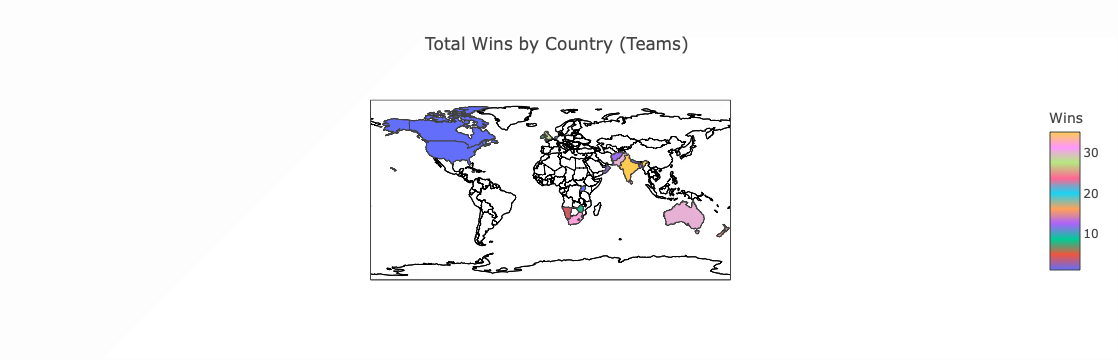

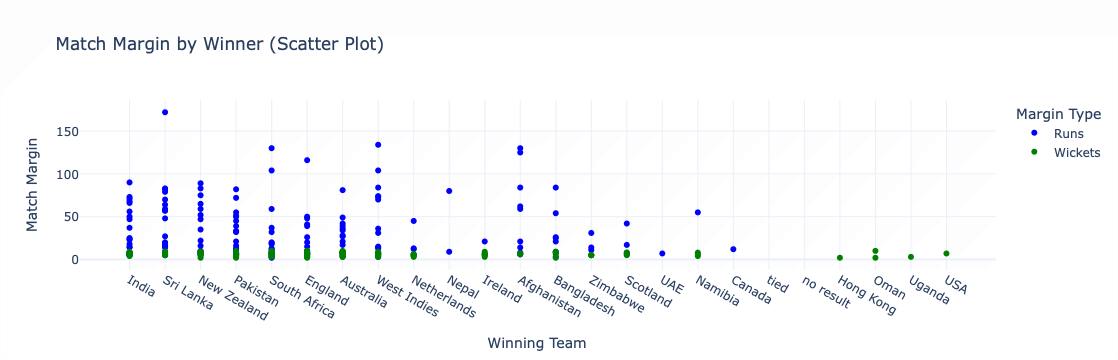

Winner   Losing Team  Margin (Runs)  Margin (Wickets) Margin Type  \
0           India      Pakistan            5.0               NaN        Runs   
1           India     Australia           15.0               NaN        Runs   
2        Pakistan   New Zealand            NaN               6.0     Wickets   
3           India  South Africa           37.0               NaN        Runs   
4        Pakistan    Bangladesh            NaN               4.0     Wickets   
..            ...           ...            ...               ...         ...   
312   Afghanistan        Uganda          125.0               NaN        Runs   
313  South Africa     Sri Lanka            NaN               6.0     Wickets   
314          tied       Namibia            NaN               NaN     Wickets   
315   West Indies           PNG            NaN               5.0     Wickets   
316           USA        Canada            NaN               7.0     Wickets   

     Margin Numeric  
0               5.0  
1              15.0  
2               6.0  
3              37.0  
4               4.0  
..              ...  
312           125.0  
313             6.0  
314             NaN  
315             5.0  
316             7.0  

[317 rows x 6 columns]

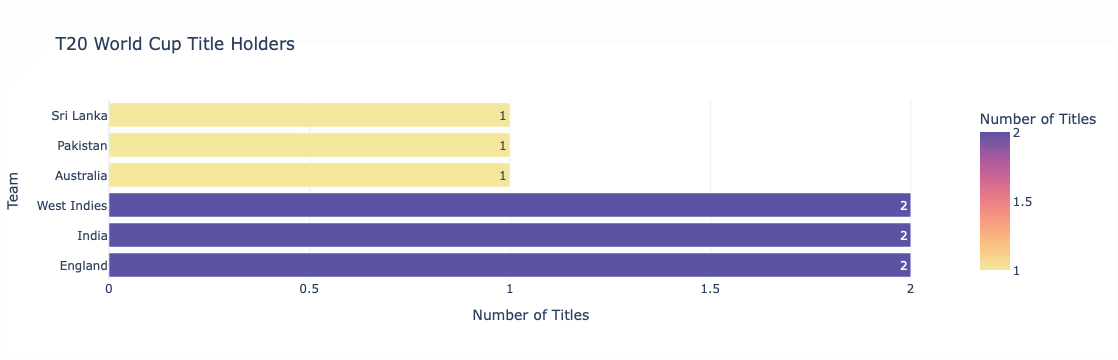

In [36]:
import pandas as pd
import plotly.express as px
import re
from IPython.display import display

# Function to extract numeric values for margins
def extract_numeric(value):
    match = re.search(r'\d+', str(value))
    return int(match.group()) if match else None

# Functions to extract margins (runs and wickets)
def extract_runs_correct(margin):
    if isinstance(margin, str) and 'runs' in margin:
        return float(margin.split()[0])
    return None

def extract_wickets_correct(margin):
    if isinstance(margin, str) and 'wickets' in margin:
        return float(margin.split()[0])
    return None

# Function to determine the losing team based on the winner
def determine_losing_team(row):
    if row['Winner'] == row['Team1']:
        return row['Team2']
    else:
        return row['Team1']

# Load the T20 World Cup dataset
wc_final_data_df = pd.read_csv('updated_wc_final_data_df.csv')

# Count wins per team
win_counts = wc_final_data_df['Winner'].value_counts().reset_index()
win_counts.columns = ['Team', 'Wins']  # Rename columns for clarity

# Bar Plot for Wins
fig_bar_wins = px.bar(
    win_counts, 
    x='Team', 
    y='Wins', 
    labels={'Wins': 'Number of Wins', 'Team': 'Team'},
    text='Wins',  
    title='Number of Wins by Country (Teams)',
    color='Wins',  
    color_continuous_scale=px.colors.qualitative.Plotly
)

fig_bar_wins.update_layout(
    xaxis_title='Team',
    yaxis_title='Number of Wins',
    hovermode='closest'
)

fig_bar_wins.show()

# Mapping teams to countries
team_mapping = {
    'India': 'India',
    'Australia': 'Australia',
    'England': 'United Kingdom',
    'Pakistan': 'Pakistan',
    'South Africa': 'South Africa',
    'Sri Lanka': 'Sri Lanka',
    'West Indies': 'Jamaica',
    'Bangladesh': 'Bangladesh',
    'Nepal': 'Nepal',
    'Zimbabwe': 'Zimbabwe',
    'Afghanistan': 'Afghanistan',
    'New Zealand': 'New Zealand',
    'Netherlands': 'Netherlands',
    'Namibia': 'Namibia',
    'Scotland': 'Scotland',
    'USA': 'United States',
    'Ireland': 'Ireland',
    'Kenya': 'Kenya',
    'Oman': 'Oman',
    'United Arab Emirates': 'United Arab Emirates',
    'Hong Kong': 'Hong Kong',
    'PNG': 'Papua New Guinea',
    'Canada': 'Canada',
    'Uganda': 'Uganda'
}

# Geospatial map for wins
wc_final_data_df['Country'] = wc_final_data_df['Winner'].map(team_mapping)
country_wins = wc_final_data_df['Country'].value_counts().reset_index()
country_wins.columns = ['Country', 'Wins']

# Choropleth map for total wins
fig_geo_wins = px.choropleth(
    country_wins,
    locations='Country',
    locationmode='country names',
    color='Wins',
    hover_name='Country',
    hover_data=['Wins'],
    title='Total Wins by Country (Teams)',
    color_continuous_scale=px.colors.qualitative.Plotly
)

fig_geo_wins.update_geos(
    showcoastlines=True,
    coastlinecolor='Black',
    landcolor='LightGray',
    countrycolor='Black',
    showsubunits=True,
    showcountries=True
)

fig_geo_wins.show()

# Add the Losing Team column
wc_final_data_df['Losing Team'] = wc_final_data_df.apply(determine_losing_team, axis=1)

# Scatter Plot for margins
wc_final_data_df['Margin (Runs)'] = wc_final_data_df['Margin'].apply(extract_runs_correct)
wc_final_data_df['Margin (Wickets)'] = wc_final_data_df['Margin'].apply(extract_wickets_correct)

# Select relevant columns, including 'Winner', 'Losing Team', and 'Margin (Runs)' or 'Margin (Wickets)'
plot_data = wc_final_data_df[['Winner', 'Losing Team', 'Margin (Runs)', 'Margin (Wickets)']].dropna(subset=['Winner', 'Losing Team'])

# Create 'Margin Type' column to differentiate between runs and wickets
plot_data['Margin Type'] = plot_data.apply(lambda row: 'Runs' if pd.notnull(row['Margin (Runs)']) else 'Wickets', axis=1)

# Create a 'Margin Numeric' column that combines 'Margin (Runs)' and 'Margin (Wickets)'
plot_data['Margin Numeric'] = plot_data.apply(lambda row: row['Margin (Runs)'] if pd.notnull(row['Margin (Runs)']) else row['Margin (Wickets)'], axis=1)

# Update the scatter plot to reflect the margin by runs or wickets
# Update the scatter plot to reflect the margin by runs or wickets
fig_win_margin = px.scatter(
    plot_data,
    x='Winner',
    y='Margin Numeric',
    title='Match Margin by Winner (Scatter Plot)',
    labels={'Margin Numeric': 'Match Margin', 'Winner': 'Winning Team'},
    color='Margin Type',  # Color by whether the margin was in Runs or Wickets
    hover_data={
        'Winner': True,
        'Margin Numeric': True,
        'Losing Team': True,
        'Margin Type': True  # Show the type of margin in hover info
    },
    color_discrete_map={
        'Runs': 'blue',
        'Wickets': 'green'
    },  # Explicitly map 'Runs' to blue and 'Wickets' to green
    template='plotly_white'  # Use a clean background
)

# Show the updated scatter plot
fig_win_margin.show()


# Display the plot data
display(plot_data)

# Add Match Date column by parsing year, month, and day
wc_final_data_df['Match Date'] = pd.to_datetime(
    wc_final_data_df[['Match Year', 'Match Month', 'Match Day']].astype(str).agg('-'.join, axis=1), errors='coerce')

# List of specific final match dates
final_dates = [
    '2007-09-24',  # September 24, 2007
    '2009-06-21',  # June 21, 2009
    '2010-05-16',  # May 16, 2010
    '2012-10-07',  # October 7, 2012
    '2014-04-06',  # April 6, 2014
    '2016-04-03',  # April 3, 2016
    '2021-11-14',  # November 14, 2021
    '2022-11-13',  # November 13, 2022
    '2024-06-29'   # June 29, 2024
]

final_dates = pd.to_datetime(final_dates)

# Filter dataset for final match dates only
final_matches_df = wc_final_data_df[wc_final_data_df['Match Date'].isin(final_dates)]

# Aggregate number of titles for each team
winner_titles = final_matches_df.groupby('Winner')['Match Date'].apply(list).reset_index(name='Final Dates')
winner_titles['Final Dates'] = winner_titles['Final Dates'].apply(lambda dates: [date.strftime('%Y-%m-%d') for date in dates])
winner_titles['Titles'] = winner_titles['Final Dates'].apply(len)

# Sort by number of titles
winner_titles = winner_titles.sort_values(by='Titles', ascending=False)

# Horizontal bar chart for titles
fig_titles = px.bar(
    winner_titles, 
    y='Winner', 
    x='Titles', 
    orientation='h',
    text='Titles',
    hover_data={'Final Dates': True},
    labels={'Titles': 'Number of Titles', 'Winner': 'Team'},
    title='T20 World Cup Title Holders',
    color='Titles',  # Use the number of titles as the color scale
    color_continuous_scale=px.colors.sequential.Sunset,  # Use a blue color scale for better visualization
    template='plotly_white'  # Clean background template
)


fig_titles.show()


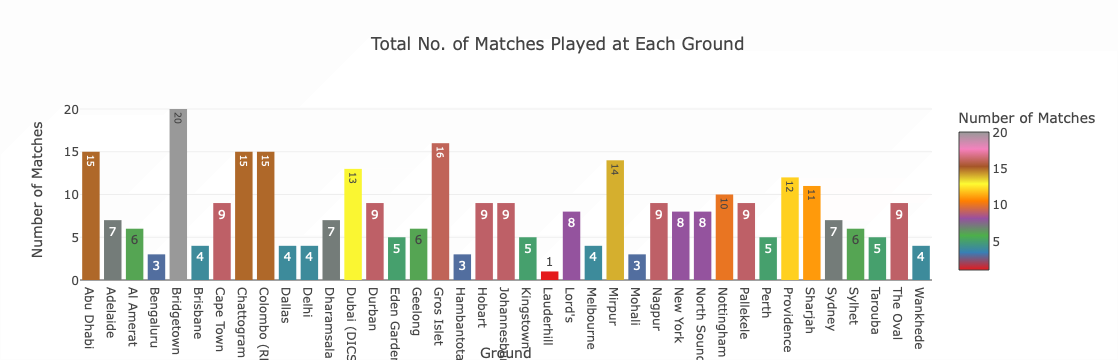

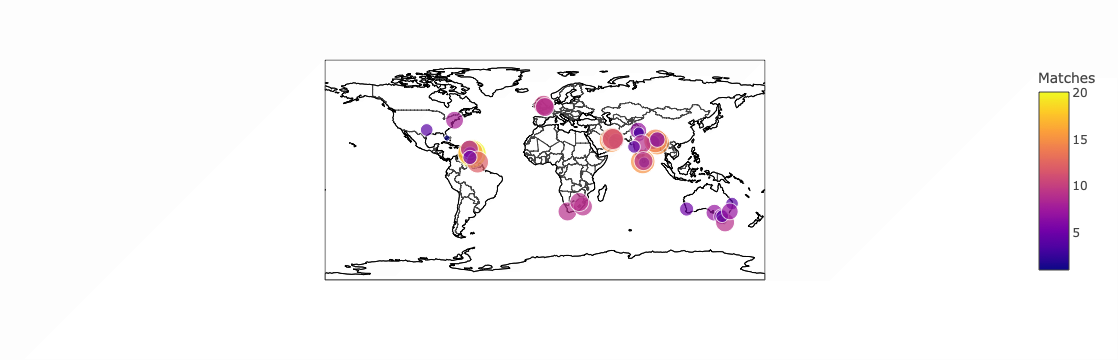

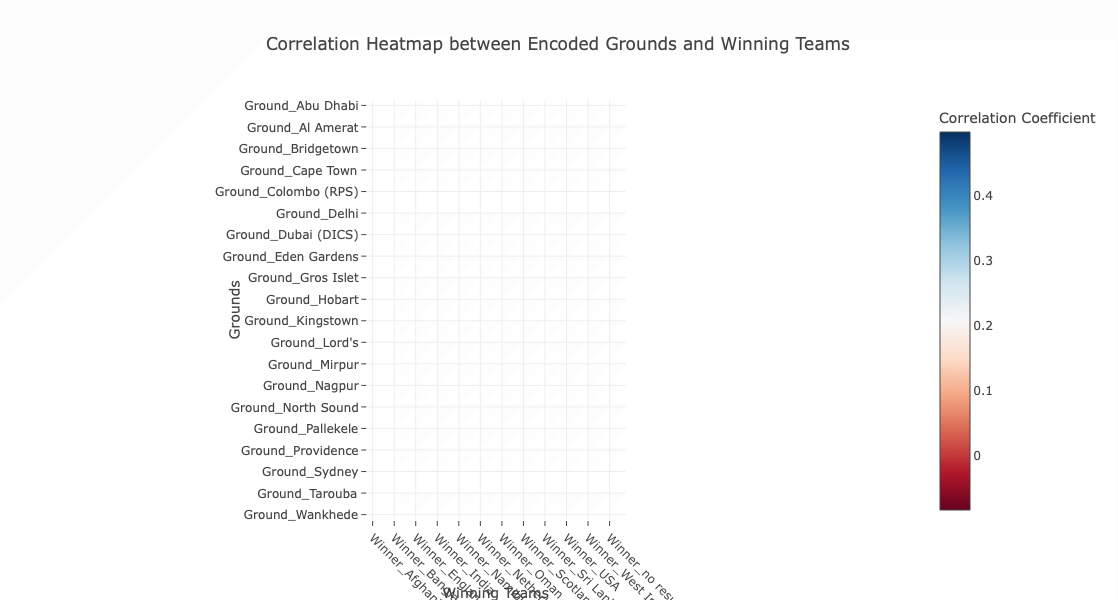

In [102]:
ground_country_mapping = {
        'Abu Dhabi': 'Abu Dhabi',
        'Adelaide': 'Australia',
        'Al Amerat': 'Oman',
        'Bengaluru': 'India',
        'Bridgetown': 'West Indies',
        'Brisbane': 'Australia',
        'Cape Town': 'South Africa',
        'Chattogram': 'Bangladesh',
        'Colombo (RPS)': 'Sri Lanka',
        'Dallas': 'United States',
        'Delhi': 'India',
        'Dharamsala': 'India',
        'Dubai (DICS)': 'United Arab Emirates',
        'Durban': 'South Africa',
        'Eden Gardens': 'India',
        'Geelong': 'Australia',
        'Gros Islet': 'West Indies',
        'Hambantota': 'Sri Lanka',
        'Hobart': 'Australia',
        'Johannesburg': 'South Africa',
        'Kingstown': 'West Indies',
        'Lauderhill': 'United States',
        'Lord\'s': 'United Kingdom',
        'Melbourne': 'Australia',
        'Mirpur': 'Bangladesh',
        'Mohali': 'India',
        'Nagpur': 'India',
        'New York': 'United States',
        'North Sound': 'West Indies',
        'Nottingham': 'United Kingdom',
        'Pallekele': 'Sri Lanka',
        'Perth': 'Australia',
        'Providence': 'West Indies',
        'Sharjah': 'United Arab Emirates',
        'Sydney': 'Australia',
        'Sylhet': 'Bangladesh',
        'Tarouba': 'West Indies',
        'The Oval': 'United Kingdom',
        'Wankhede': 'India'
    }
ground_data = {
        'Abu Dhabi': {'Country': 'United Arab Emirates', 'Lat': 24.4539, 'Lon': 54.3773},
        'Adelaide': {'Country': 'Australia', 'Lat': -34.9285, 'Lon': 138.6007},
        'Al Amerat': {'Country': 'Oman', 'Lat': 23.5881, 'Lon': 58.1364},
        'Bengaluru': {'Country': 'India', 'Lat': 12.9716, 'Lon': 77.5946},
        'Bridgetown': {'Country': 'West Indies', 'Lat': 13.1939, 'Lon': -59.6131},
        'Brisbane': {'Country': 'Australia', 'Lat': -27.4698, 'Lon': 153.0251},
        'Cape Town': {'Country': 'South Africa', 'Lat': -33.9249, 'Lon': 18.4241},
        'Chattogram': {'Country': 'Bangladesh', 'Lat': 22.3475, 'Lon': 91.8123},
        'Colombo (RPS)': {'Country': 'Sri Lanka', 'Lat': 6.9271, 'Lon': 79.9553},
        'Dallas': {'Country': 'United States', 'Lat': 32.7767, 'Lon': -96.7970},
        'Delhi': {'Country': 'India', 'Lat': 28.6139, 'Lon': 77.2090},
        'Dharamsala': {'Country': 'India', 'Lat': 32.2196, 'Lon': 76.3238},
        'Dubai (DICS)': {'Country': 'United Arab Emirates', 'Lat': 25.276987, 'Lon': 55.296249},
        'Durban': {'Country': 'South Africa', 'Lat': -29.8587, 'Lon': 31.0218},
        'Eden Gardens': {'Country': 'India', 'Lat': 22.5697, 'Lon': 88.3426},
        'Geelong': {'Country': 'Australia', 'Lat': -38.1499, 'Lon': 144.3617},
        'Gros Islet': {'Country': 'West Indies', 'Lat': 14.0589, 'Lon': -60.9492},
        'Hambantota': {'Country': 'Sri Lanka', 'Lat': 6.1246, 'Lon': 81.1183},
        'Hobart': {'Country': 'Australia', 'Lat': -42.8821, 'Lon': 147.3272},
        'Johannesburg': {'Country': 'South Africa', 'Lat': -26.2041, 'Lon': 28.0473},
        'Kingstown': {'Country': 'West Indies', 'Lat': 13.1579, 'Lon': -61.2248},
        'Lauderhill': {'Country': 'United States', 'Lat': 26.1483, 'Lon': -80.2133},
        'Lord\'s': {'Country': 'United Kingdom', 'Lat': 51.5264, 'Lon': -0.1965},
        'Melbourne': {'Country': 'Australia', 'Lat': -37.8136, 'Lon': 144.9631},
        'Mirpur': {'Country': 'Bangladesh', 'Lat': 23.8103, 'Lon': 90.4125},
        'Mohali': {'Country': 'India', 'Lat': 30.6928, 'Lon': 76.7480},
        'Nagpur': {'Country': 'India', 'Lat': 21.1458, 'Lon': 79.0882},
        'New York': {'Country': 'United States', 'Lat': 40.7128, 'Lon': -74.0060},
        'North Sound': {'Country': 'West Indies', 'Lat': 17.1381, 'Lon': -61.8456},
        'Nottingham': {'Country': 'United Kingdom', 'Lat': 52.9541, 'Lon': -1.1580},
        'Pallekele': {'Country': 'Sri Lanka', 'Lat': 7.2868, 'Lon': 80.5906},
        'Perth': {'Country': 'Australia', 'Lat': -31.9505, 'Lon': 115.8605},
        'Providence': {'Country': 'West Indies', 'Lat': 6.5030, 'Lon': -55.1708},
        'Sharjah': {'Country': 'United Arab Emirates', 'Lat': 25.3375, 'Lon': 55.5123},
        'Sydney': {'Country': 'Australia', 'Lat': -33.8688, 'Lon': 151.2093},
        'Sylhet': {'Country': 'Bangladesh', 'Lat': 24.8949, 'Lon': 91.8687},
        'Tarouba': {'Country': 'West Indies', 'Lat': 10.2900, 'Lon': -61.4240},
        'The Oval': {'Country': 'United Kingdom', 'Lat': 51.4815, 'Lon': -0.1071},
        'Wankhede': {'Country': 'India', 'Lat': 18.9385, 'Lon': 72.8347}
    }


# Create DataFrame from ground_data
ground_df = pd.DataFrame.from_dict(ground_data, orient='index')
ground_df.reset_index(inplace=True)
ground_df.columns = ['Ground', 'Country', 'Lat', 'Lon']

# Get match counts for each ground
ground_match_counts = wc_final_data_df['Ground'].value_counts().reset_index()
ground_match_counts.columns = ['Ground', 'Matches'] 

# Merge ground data with match counts
merged_data = pd.merge(ground_df, ground_match_counts, on='Ground', how='left')

# Bar chart: Total No. of Matches Played at each Ground
fig_grounds_bar = px.bar(
    merged_data,
    x='Ground',
    y='Matches',
    labels={'Matches': 'Number of Matches', 'Ground': 'Ground'},
    title='Total No. of Matches Played at Each Ground',
    color='Matches',
    color_continuous_scale=px.colors.qualitative.Set1,  # Vibrant color scheme
    text='Matches'
)
fig_grounds_bar.update_layout(
    xaxis_title='Ground',
    yaxis_title='Number of Matches'
)
# Show bar chart
fig_grounds_bar.show()

# Geospatial scatter plot: Match distribution across grounds
fig_grounds = px.scatter_geo(
    merged_data,
    lat='Lat',
    lon='Lon',
    size='Matches',
    hover_name='Ground',
    hover_data=['Country', 'Matches'],
    color='Matches',
    color_continuous_scale=px.colors.sequential.Plasma  # Vibrant color palette
)
fig_grounds.update_geos(
    showcoastlines=True,
    coastlinecolor='Black',
    showsubunits=True,
    showcountries=True
)
# Show geospatial scatter plot
fig_grounds.show()

# Winners at each Ground
ground_matches = wc_final_data_df['Ground'].value_counts().reset_index()
ground_matches.columns = ['Ground', 'Matches']  
ground_matches['Winning Teams'] = ground_matches['Ground'].map(
    lambda x: ', '.join(wc_final_data_df[wc_final_data_df['Ground'] == x]['Winner'].unique())
)



# Heatmap for correlation between encoded Grounds and Winning Teams
fig_corr_heatmap = px.imshow(
    correlation_matrix_filtered,
    title='Correlation Heatmap between Encoded Grounds and Winning Teams',
    labels=dict(x='Winning Teams', y='Grounds', color='Correlation Coefficient'),
    color_continuous_scale='RdBu',
    text_auto=':.2f'
)
fig_corr_heatmap.update_layout(
    xaxis_title='Winning Teams',
    yaxis_title='Grounds',
    width=800,
    height=600,
    xaxis=dict(tickangle=45),  # Tilt x-axis labels for better readability
    yaxis=dict(tickangle=0)
)
# Show correlation heatmap
fig_corr_heatmap.show()



We have used one-hot encoding to convert categorical data from the Winner and Ground columns into numerical format, creating separate binary columns for each unique team and ground. One-hot encoding is essential because correlation analysis requires numerical data, and categorical values like team names or ground names cannot be directly analyzed. By encoding these categories, the code enables the calculation of a correlation matrix that reveals the relationships between winning teams and the grounds where they played, helping uncover patterns like home-ground advantages or favored venues.

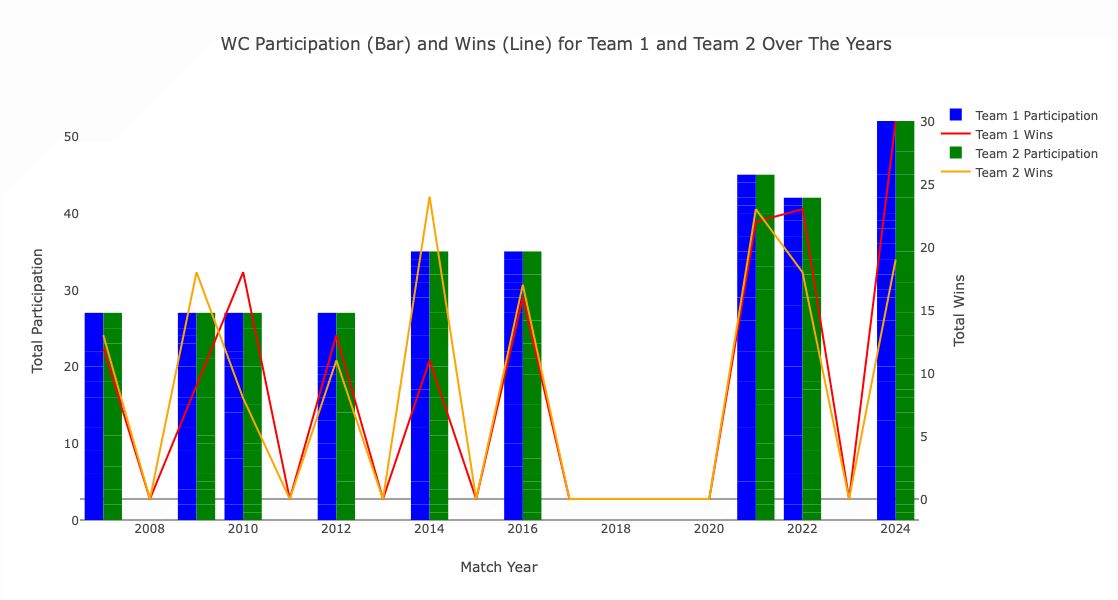

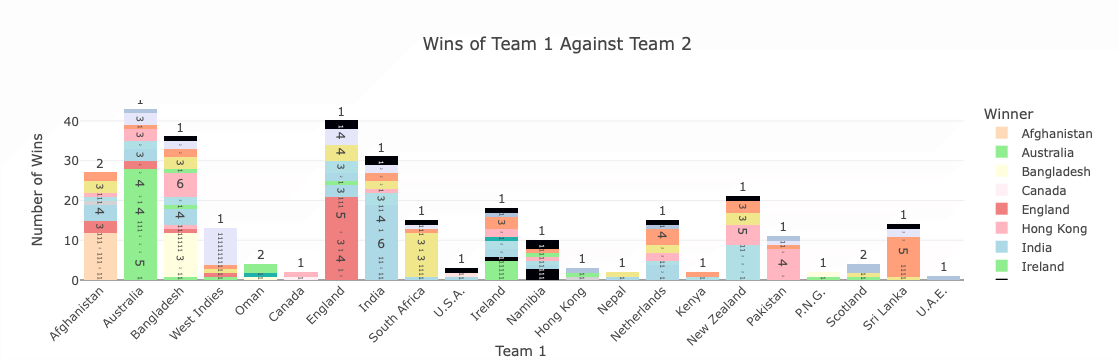

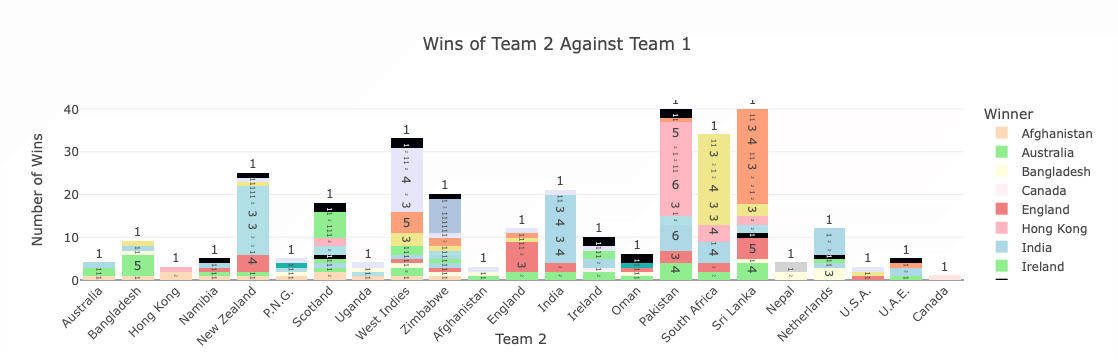

In [38]:

# Ensure 'Match Year' exists
if 'Match Year' not in wc_final_data_df.columns:
    wc_final_data_df['Match Year'] = pd.to_datetime(wc_final_data_df['Match Date'], errors='coerce').dt.year

all_years = pd.Series(range(2007, 2025))

# Team 1 participation and wins
team1_participation = wc_final_data_df.groupby(['Match Year', 'Team1']).size().reset_index(name='Total Participation')
team1_wins = wc_final_data_df[wc_final_data_df['Winner'] == wc_final_data_df['Team1']].groupby('Match Year').size().reset_index(name='Total Wins')

# Merging participation and wins for Team 1
team1_stats = pd.merge(all_years.to_frame(name='Match Year'), team1_participation, how='left', on='Match Year')
team1_stats = pd.merge(team1_stats, team1_wins, how='left', on='Match Year')
team1_stats['Total Participation'] = team1_stats['Total Participation'].fillna(0)
team1_stats['Total Wins'] = team1_stats['Total Wins'].fillna(0)

# Team 2 participation and wins
team2_participation = wc_final_data_df.groupby(['Match Year', 'Team2']).size().reset_index(name='Total Participation')
team2_wins = wc_final_data_df[wc_final_data_df['Winner'] == wc_final_data_df['Team2']].groupby('Match Year').size().reset_index(name='Total Wins')

# Merging participation and wins for Team 2
team2_stats = pd.merge(all_years.to_frame(name='Match Year'), team2_participation, how='left', on='Match Year')
team2_stats = pd.merge(team2_stats, team2_wins, how='left', on='Match Year')
team2_stats['Total Participation'] = team2_stats['Total Participation'].fillna(0)
team2_stats['Total Wins'] = team2_stats['Total Wins'].fillna(0)

# Plot participation and wins for Team 1 and Team 2
fig_team1_team2 = go.Figure()
fig_team1_team2.add_trace(go.Bar(
    x=team1_stats['Match Year'], 
    y=team1_stats['Total Participation'], 
    name='Team 1 Participation', 
    marker_color='blue',
    yaxis='y'
))
fig_team1_team2.add_trace(go.Scatter(
    x=team1_stats['Match Year'], 
    y=team1_stats['Total Wins'], 
    mode='lines', 
    name='Team 1 Wins', 
    line=dict(color='red'),
    yaxis='y2'
))
fig_team1_team2.add_trace(go.Bar(
    x=team2_stats['Match Year'], 
    y=team2_stats['Total Participation'], 
    name='Team 2 Participation', 
    marker_color='green',
    yaxis='y'
))
fig_team1_team2.add_trace(go.Scatter(
    x=team2_stats['Match Year'], 
    y=team2_stats['Total Wins'], 
    mode='lines', 
    name='Team 2 Wins', 
    line=dict(color='orange'),
    yaxis='y2'
))

fig_team1_team2.update_layout(
    title='WC Participation (Bar) and Wins (Line) for Team 1 and Team 2 Over The Years',
    xaxis_title='Match Year',
    yaxis=dict(
        title='Total Participation',
        showgrid=False
    ),
    yaxis2=dict(
        title='Total Wins',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    width=1000,
    height=600,
    barmode='group',
    hovermode='closest'
)
# Show the plot
fig_team1_team2.show()

# Prepare data for bar plots showing wins of Team 1 and Team 2
win_counts = all_matches_data_df.groupby(['Winner', 'Team1', 'Team2']).size().reset_index(name='Wins')
win_counts['Hover Text'] = win_counts.apply(lambda row: f"Team 1: {row['Team1']}<br>Team 2: {row['Team2']}<br>Winner: {row['Winner']}<br>Wins: {row['Wins']}", axis=1)

# Define color map for the teams
color_map = {
    'India': 'lightblue',
    'Australia': 'lightgreen',
    'England': 'lightcoral',
    'Pakistan': 'lightpink',
    'South Africa': 'khaki',
    'Sri Lanka': 'lightsalmon',
    'West Indies': 'lavender',
    'Bangladesh': 'lightyellow',
    'Nepal': 'lightgray',
    'Zimbabwe': 'lightsteelblue',
    'Afghanistan': 'peachpuff',
    'New Zealand': 'powderblue',
    'Netherlands': 'lightblue',
    'Scotland': 'lightgreen',
    'U.S.A.': 'mistyrose',
    'Ireland': 'lightgreen',
    'Kenya': 'lightcyan',
    'Oman': 'lightseagreen',
    'United Arab Emirates': 'lightgoldenrodyellow',
    'Hong Kong': 'lightpink',
    'P.N.G': 'lightcoral',
    'Canada': 'lavenderblush',
    'Uganda': 'lightyellow',
    'No Result': 'whitesmoke',
    'Tied': 'lightgrey'
}

# Bar plot for wins of Team 1 against Team 2
fig_team1_over_team2 = px.bar(
    win_counts,
    x='Team1',
    y='Wins',
    color='Winner',
    title='Wins of Team 1 Against Team 2',
    labels={'Wins': 'Number of Wins', 'Team1': 'Team 1'},
    text='Wins',
    hover_name='Hover Text',
    color_discrete_map=color_map
)

fig_team1_over_team2.update_layout(
    xaxis_title='Team 1',
    yaxis_title='Number of Wins',
    hovermode='closest',
    barmode='stack',
    xaxis_tickangle=-45
)

# Show bar plot
fig_team1_over_team2.show()

# Bar plot for wins of Team 2 against Team 1
fig_team2_over_team1 = px.bar(
    win_counts,
    x='Team2',
    y='Wins',
    color='Winner',
    title='Wins of Team 2 Against Team 1',
    labels={'Wins': 'Number of Wins', 'Team2': 'Team 2'},
    text='Wins',
    hover_name='Hover Text',
    color_discrete_map=color_map
)

# Customize the layout
fig_team2_over_team1.update_layout(
    xaxis_title='Team 2',
    yaxis_title='Number of Wins',
    hovermode='closest',
    barmode='stack',
    xaxis_tickangle=-45
)

# Show bar plot
fig_team2_over_team1.show()


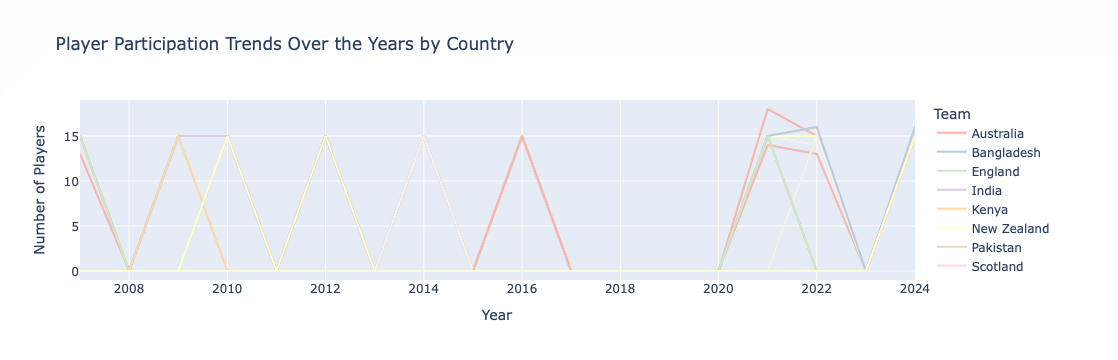

Year        Team  Player Count
0    2007   Australia          13.0
1    2007  Bangladesh          15.0
2    2007     England          15.0
3    2007       India          15.0
4    2007       Kenya          15.0
..    ...         ...           ...
427  2024     Namibia          16.0
428  2024         PNG          15.0
429  2024      Canada          15.0
430  2024         USA          15.0
431  2024      Uganda          15.0

[432 rows x 3 columns]

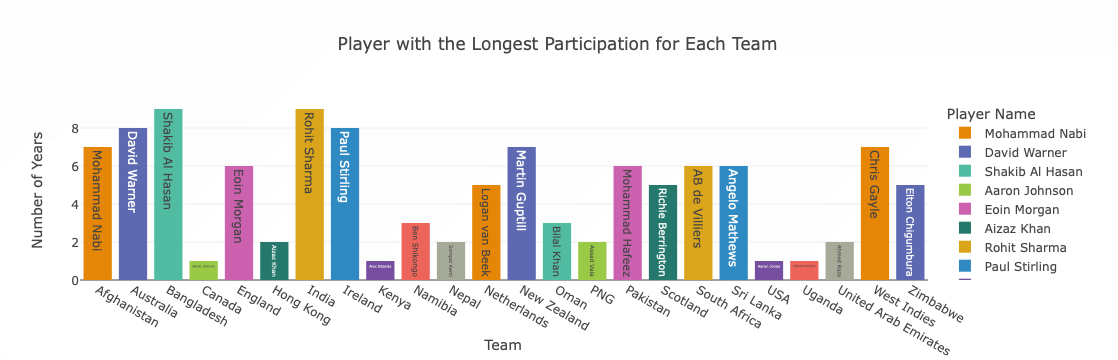

Player Name                  Team  Years Participated
562      Mohammad Nabi           Afghanistan                   7
207       David Warner             Australia                   8
793    Shakib Al Hasan            Bangladesh                   9
3        Aaron Johnson                Canada                   1
252        Eoin Morgan               England                   6
30          Aizaz Khan             Hong Kong                   2
726       Rohit Sharma                 India                   9
650      Paul Stirling               Ireland                   8
44         Alex Obanda                 Kenya                   1
108       Ben Shikongo               Namibia                   3
834        Sompal Kami                 Nepal                   2
483     Logan van Beek           Netherlands                   5
514     Martin Guptill           New Zealand                   7
116         Bilal Khan                  Oman                   3
91          Assad Vala                   PNG                   2
556    Mohammad Hafeez              Pakistan                   6
708  Richie Berrington              Scotland                   5
0       AB de Villiers          South Africa                   6
71      Angelo Mathews             Sri Lanka                   6
4          Aaron Jones                   USA                   1
49      Alpesh Ramjani                Uganda                   1
26          Ahmed Raza  United Arab Emirates                   2
158        Chris Gayle           West Indies                   7
251   Elton Chigumbura              Zimbabwe                   5

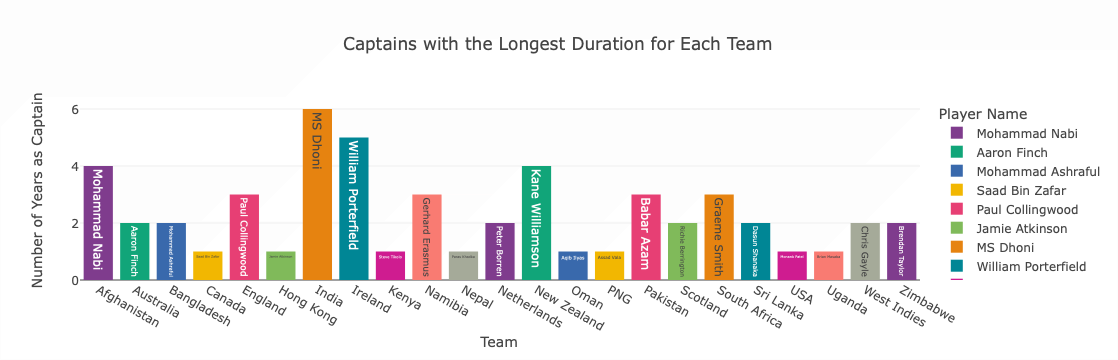

Player Name          Team  Captaincy Duration
37        Mohammad Nabi   Afghanistan                   4
1           Aaron Finch     Australia                   2
35    Mohammad Ashraful    Bangladesh                   2
58       Saad Bin Zafar        Canada                   1
43     Paul Collingwood       England                   3
22       Jamie Atkinson     Hong Kong                   1
29             MS Dhoni         India                   6
70  William Porterfield       Ireland                   5
63         Steve Tikolo         Kenya                   1
19      Gerhard Erasmus       Namibia                   3
42         Paras Khadka         Nepal                   1
45         Peter Borren   Netherlands                   2
24      Kane Williamson   New Zealand                   4
5            Aqib Ilyas          Oman                   1
6            Assad Vala           PNG                   1
7            Babar Azam      Pakistan                   3
51    Richie Berrington      Scotland                   2
20         Graeme Smith  South Africa                   3
14        Dasun Shanaka     Sri Lanka                   2
38         Monank Patel           USA                   1
10         Brian Masaba        Uganda                   1
11          Chris Gayle   West Indies                   2
8        Brendan Taylor      Zimbabwe                   2

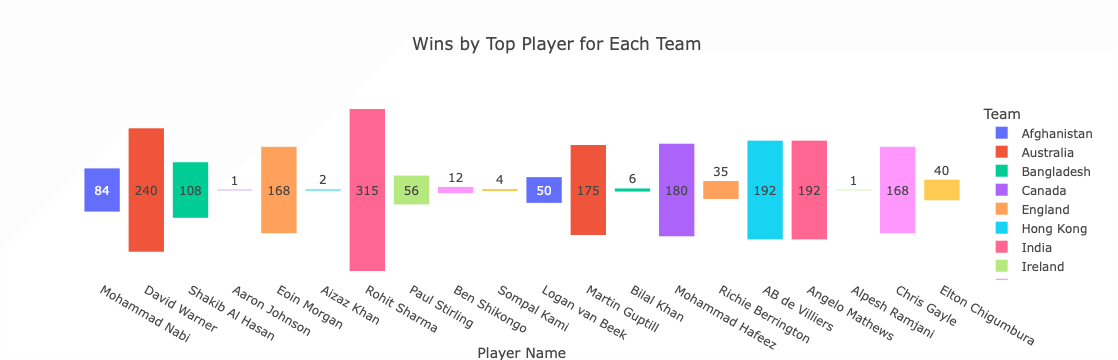

Player Name          Team  Wins
516      Mohammad Nabi   Afghanistan    84
186       David Warner     Australia   240
727    Shakib Al Hasan    Bangladesh   108
3        Aaron Johnson        Canada     1
230        Eoin Morgan       England   168
27          Aizaz Khan     Hong Kong     2
668       Rohit Sharma         India   315
595      Paul Stirling       Ireland    56
95        Ben Shikongo       Namibia    12
765        Sompal Kami         Nepal     4
440     Logan van Beek   Netherlands    50
470     Martin Guptill   New Zealand   175
103         Bilal Khan          Oman     6
510    Mohammad Hafeez      Pakistan   180
651  Richie Berrington      Scotland    35
0       AB de Villiers  South Africa   192
61      Angelo Mathews     Sri Lanka   192
42      Alpesh Ramjani        Uganda     1
141        Chris Gayle   West Indies   168
229   Elton Chigumbura      Zimbabwe    40

In [39]:
import pandas as pd
import plotly.express as px
from IPython.display import display

# Player participation trends
players_by_country = players_df['Team'].value_counts()
player_participation_trends = players_df.groupby(['Year', 'Team']).size().reset_index(name='Player Count')
player_distribution = player_participation_trends.pivot_table(index='Year', columns='Team', values='Player Count', fill_value=0)

# Create all years and teams data
all_years = pd.DataFrame({'Year': list(range(2007, 2025))})
all_teams = player_participation_trends['Team'].unique()
all_years_teams = pd.MultiIndex.from_product([all_years['Year'], all_teams], names=['Year', 'Team']).to_frame(index=False)
player_participation_trends = pd.merge(all_years_teams, player_participation_trends, on=['Year', 'Team'], how='left')
player_participation_trends['Player Count'] = player_participation_trends['Player Count'].fillna(0)

# Line chart for player participation trends with colorful palette
fig_players = px.line(player_participation_trends, 
                    x='Year', 
                    y='Player Count', 
                    color='Team', 
                    title='Player Participation Trends Over the Years by Country',
                    labels={'Player Count': 'Number of Players', 'Year': 'Year'},
                    template='plotly',
                    color_discrete_sequence=px.colors.qualitative.Pastel1)  # Colorful pastel palette

# Show line plot
fig_players.show()

# Display DataFrame
display(player_participation_trends)

# Players with the longest participation
player_participation = players_df.groupby(['Player Name', 'Team'])['Year'].nunique().reset_index(name='Years Participated')
longest_participation = player_participation.loc[player_participation.groupby('Team')['Years Participated'].idxmax()]

# Bar chart for longest participation with colorful palette
fig_longest_participation = px.bar(longest_participation, 
                    x='Team', 
                    y='Years Participated', 
                    color='Player Name', 
                    title='Player with the Longest Participation for Each Team',
                    labels={'Years Participated': 'Number of Years', 'Team': 'Team'},
                    text='Player Name',
                    color_discrete_sequence=px.colors.qualitative.Vivid)  # Vivid colors

# Show bar plot
fig_longest_participation.show()

# Display DataFrame for longest participation
display(longest_participation)

# Merging captains_df and players_df to include captaincy information
if 'Year' in players_df.columns and 'Year' in captains_df.columns:
    merged_data_captains = pd.merge(players_df, captains_df, on=['Player Name', 'Team', 'Year'], how='inner')

    # Players with the longest captaincy duration
    captain_durations = merged_data_captains.groupby(['Player Name', 'Team'])['Year'].nunique().reset_index(name='Captaincy Duration')
    longest_captaincy = captain_durations.loc[captain_durations.groupby('Team')['Captaincy Duration'].idxmax()]

    # Bar chart for captains with longest durations using colorful palette
    fig_longest_captains = px.bar(longest_captaincy, 
                    x='Team', 
                    y='Captaincy Duration', 
                    color='Player Name', 
                    title='Captains with the Longest Duration for Each Team',
                    labels={'Captaincy Duration': 'Number of Years as Captain', 'Team': 'Team'},
                    text='Player Name',
                    color_discrete_sequence=px.colors.qualitative.Bold)  # Bold, vibrant colors

    # Show bar plot for longest captaincy
    fig_longest_captains.show()

    # Display DataFrame for longest captaincy
    display(longest_captaincy)
else:
    print("Error: 'Year' column is missing in either players_df or captains_df.")

# Merging all_matches_data_df and players_df to calculate wins
merged_data = pd.merge(all_matches_data_df, players_df, how='inner', left_on='Winner', right_on='Team')
player_wins = merged_data.groupby(['Player Name', 'Team']).size().reset_index(name='Wins')

# Top players by wins
top_players_by_wins = player_wins.loc[player_wins.groupby('Team')['Wins'].idxmax()]

# Funnel plot for players with maximum wins using colorful palette
fig_funnel = px.funnel(top_players_by_wins, 
                    x='Player Name', 
                    y='Wins', 
                    color='Team', 
                    title='Wins by Top Player for Each Team',
                    labels={'Wins': 'Number of Wins', 'Player Name': 'Player Name'},
                    color_discrete_sequence=px.colors.qualitative.Plotly)  # Plotly vibrant colors

# Show funnel plot
fig_funnel.show()

# Display DataFrame for top players by wins
display(top_players_by_wins)


### Feature Engineering

In [41]:
# Feature Engineering and Data Transformation on the dataset

# 1. Derive "Home Advantage" feature
# Assume teams have an advantage when the match is played in their home country
# (Simple assumption based on team names and ground locations)
updated_wc_final_data_df['Home Advantage'] = updated_wc_final_data_df.apply(
    lambda row: 1 if row['Team1'] in row['Ground'] or row['Team2'] in row['Ground'] else 0, axis=1
)

# 2. Normalize ranking differences
# Normalize Batting and Bowling Ranking Difference columns to a 0-1 range for comparison
scaler = MinMaxScaler()
updated_wc_final_data_df[['Normalized Batting Difference', 'Normalized Bowling Difference']] = scaler.fit_transform(
    updated_wc_final_data_df[['Batting Ranking Difference', 'Bowling Ranking Difference']]
)

# 3. Create a feature for "Winning Margin Type"
# Categorize matches into "Close Match" or "Dominant Win" based on run/wicket margins
def categorize_margin(row):
    if row['Margin (Runs)'] > 20 or row['Margin (Wickets)'] > 5:
        return 'Dominant Win'
    elif row['Margin (Runs)'] > 0 or row['Margin (Wickets)'] > 0:
        return 'Close Match'
    else:
        return 'No Result'
updated_wc_final_data_df['Winning Margin Type'] = updated_wc_final_data_df.apply(categorize_margin, axis=1)

# 4. Aggregate performance by year
# Compute yearly aggregates for team performance metrics
updated_wc_final_data_df['Match Importance'] = updated_wc_final_data_df['T-20 Int Match'].apply(
    lambda x: 'High' if x > 300 else 'Low'
)

# 5. Create a feature for "Match Importance"
# Assume later-stage matches (e.g., finals) are more important based on match numbers
updated_wc_final_data_df['Rolling Win %'] = updated_wc_final_data_df.groupby('Team1')['Team1 win % over Team2'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)
updated_wc_final_data_df['Rolling Margin (Runs)'] = updated_wc_final_data_df.groupby('Team1')['Margin (Runs)'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)
updated_wc_final_data_df['Rolling Margin (Wickets)'] = updated_wc_final_data_df.groupby('Team1')['Margin (Wickets)'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# 6. Team Strength Index
# Combine Batting and Bowling rankings to create a Team Strength Index for both teams

updated_wc_final_data_df['Team1 Strength Index'] = (
    updated_wc_final_data_df['Team1 Avg Batting Ranking'] * 0.5 +
    updated_wc_final_data_df['Team1 Avg Bowling Ranking'] * 0.5
)
updated_wc_final_data_df['Team2 Strength Index'] = (
    updated_wc_final_data_df['Team2 Avg Batting Ranking'] * 0.5 +
    updated_wc_final_data_df['Team2 Avg Bowling Ranking'] * 0.5
)

# 7. Match Outcome as a Binary Feature
# Indicate whether Team1 won the match

updated_wc_final_data_df['Team1 Win'] = updated_wc_final_data_df['Winner'].apply(
    lambda x: 1 if x == 'Team1' else 0
)

# 8.  Derived Features for Batting/Bowling Disparity
# Calculate batting and bowling disparities between Team1 and Team2

updated_wc_final_data_df['Batting Disparity'] = updated_wc_final_data_df['Team1 Avg Batting Ranking'] - updated_wc_final_data_df['Team2 Avg Batting Ranking']
updated_wc_final_data_df['Bowling Disparity'] = updated_wc_final_data_df['Team1 Avg Bowling Ranking'] - updated_wc_final_data_df['Team2 Avg Bowling Ranking']

# 9. Performance in High-Pressure Matches
# Track wins and margins in high-pressure matches

updated_wc_final_data_df['High Pressure Win'] = updated_wc_final_data_df.apply(
    lambda row: 1 if row['Match Importance'] == 'High' and row['Team1 Win'] == 1 else 0, axis=1
)

# 10. Head-to-Head Records
# Aggregated stats for Team1 vs Team2 pairs

head_to_head_stats = updated_wc_final_data_df.groupby(['Team1', 'Team2']).agg({
    'Team1 Win': 'sum',
    'Margin (Runs)': 'mean',
    'Margin (Wickets)': 'mean'
}).reset_index()
head_to_head_stats.rename(columns={
    'Team1 Win': 'Head-to-Head Wins',
    'Margin (Runs)': 'Avg Margin (Runs)',
    'Margin (Wickets)': 'Avg Margin (Wickets)'
}, inplace=True)
updated_wc_final_data_df = updated_wc_final_data_df.merge(
    head_to_head_stats, 
    on=['Team1', 'Team2'], 
    how='left', 
    suffixes=('', '_head_to_head')
)

# 11. Seasonality Analysis
# Add features for the seasonality of the match

updated_wc_final_data_df['Season'] = updated_wc_final_data_df['Match Month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 
              'Spring' if x in [3, 4, 5] else 
              'Summer' if x in [6, 7, 8] else 'Fall'
)

# Display the final dataset with all feature engineering steps
# Display column names
print(updated_wc_final_data_df.columns.tolist())

updated_wc_final_data_df.head()


['Team1', 'Team2', 'Winner', 'Margin', 'Ground', 'T-20 Int Match', 'Team1 Avg Batting Ranking', 'Team2 Avg Batting Ranking', 'Team1 Avg Bowling Ranking', 'Team2 Avg Bowling Ranking', 'Team1 Total WCs participated', 'Team1 Total WCs won', 'Team2 Total WCs participated', 'Team2 Total WCs won', 'Team1 win % over Team2', 'Match Year', 'Match Month', 'Match Day', 'Margin (Runs)', 'Margin (Wickets)', 'Batting Ranking Difference', 'Bowling Ranking Difference', 'Home Advantage', 'Normalized Batting Difference', 'Normalized Bowling Difference', 'Winning Margin Type', 'Match Importance', 'Rolling Win %', 'Rolling Margin (Runs)', 'Rolling Margin (Wickets)', 'Team1 Strength Index', 'Team2 Strength Index', 'Team1 Win', 'Batting Disparity', 'Bowling Disparity', 'High Pressure Win', 'Head-to-Head Wins', 'Avg Margin (Runs)', 'Avg Margin (Wickets)', 'Season']


Team1     Team2    Winner     Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5 runs  Johannesburg              46   
1     Australia     India     India    15 runs        Durban              45   
2   New Zealand  Pakistan  Pakistan  6 wickets     Cape Town              44   
3  South Africa     India     India    37 runs        Durban              43   
4    Bangladesh  Pakistan  Pakistan  4 wickets     Cape Town              42   

   Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
0                      67.13                      65.87   
1                      66.54                      70.20   
2                      66.07                      67.20   
3                      69.53                      75.67   
4                      75.53                      69.67   

   Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  ...  \
0                      80.67                      63.40  ...   
1                      58.77                      82.40  ...   
2                      68.60                      66.60  ...   
3                      76.93                      86.33  ...   
4                      70.60                      68.33  ...   

   Team1 Strength Index  Team2 Strength Index  Team1 Win  Batting Disparity  \
0                73.900                64.635          0               1.26   
1                62.655                76.300          0              -3.66   
2                67.335                66.900          0              -1.13   
3                73.230                81.000          0              -6.14   
4                73.065                69.000          0               5.86   

   Bowling Disparity  High Pressure Win  Head-to-Head Wins  Avg Margin (Runs)  \
0              17.27                  0                  0              1.375   
1             -23.63                  0                  0             32.200   
2               2.00                  0                  0              5.000   
3              -9.40                  0                  0             37.000   
4               2.27                  0                  0             21.000   

   Avg Margin (Wickets)  Season  
0              4.375000    Fall  
1              1.800000    Fall  
2              3.428571    Fall  
3              0.000000    Fall  
4              2.833333    Fall  

[5 rows x 40 columns]

In [42]:
import pandas as pd

# Assuming updated_wc_final_data_df is already loaded

# Check the distribution of the target variable
print("### Distribution of `Team1 Win`")
team1_win_counts = updated_wc_final_data_df['Team1 Win'].value_counts()
print(team1_win_counts)

# Optional: Print percentage distribution
print("### Percentage Distribution of `Team1 Win`")
team1_win_percentage = updated_wc_final_data_df['Team1 Win'].value_counts(normalize=True) * 100
print(team1_win_percentage.map("{:.2f}%".format))

### Distribution of `Team1 Win`
Team1 Win
0    317
Name: count, dtype: int64
### Percentage Distribution of `Team1 Win`
Team1 Win
0    100.00%
Name: proportion, dtype: object


# 🐻🐻

## Feature Engineering

### Home Advantage
- Binary feature indicating home-ground advantage based on match location

### Normalized Ranking Differences
- Batting and bowling ranking differences normalized to 0-1 range

### Winning Margin Type
- Categorizes matches as:
  - "Dominant Win"
  - "Close Match"
  - "No Result"

### Match Importance
- Assigns "High" or "Low" importance based on match sequence number

### Rolling Averages (Last 3 Matches)
- Team1's win percentage
- Margin of runs
- Margin of wickets

### Team Strength Index
- Composite index combining batting and bowling rankings

### Match Outcome as Binary
- 1: Team1 won
- 0: Team1 lost

### Batting and Bowling Disparities
- Differences in rankings between Team1 and Team2

### High-Pressure Match Performance
- Tracks Team1's wins in high-importance matches

### Head-to-Head Statistics
- Total wins
- Average margin in runs
- Average margin in wickets

### Seasonality Analysis
- Classifies matches by season:
  - Winter
  - Spring
  - Summer
  - Fall

## Advanced Data Transformation Methods Demonstrated

The code showcases several **advanced data transformation methods** to extract meaningful insights and prepare data for further analysis or modeling. Below is a detailed explanation of these methods:


### **1. Normalization**
- **What it does:** 
  Transforms features (`Batting Ranking Difference` and `Bowling Ranking Difference`) into a normalized range [0,1].
- **Purpose:** 
  Ensures comparability of metrics across different scales, which is vital for machine learning and visual analysis.
- **Technique Used:** 
  `MinMaxScaler` from `sklearn`.


### **2. Rolling Averages**
- **What it does:** 
  Calculates rolling averages for win percentage, run margins, and wicket margins over the last three matches for each team.
- **Purpose:** 
  Smoothens out fluctuations to highlight performance trends over time.
- **Technique Used:** 
  `rolling` method on grouped data, applying a window of size 3.


### **3. Grouped Aggregation**
- **What it does:** 
  Aggregates statistics (e.g., total wins, average margins) for Team1 vs. Team2 pairs using `groupby` and `agg`.
- **Purpose:** 
  Summarizes historical head-to-head performance for more concise analysis.
- **Technique Used:** 
  Custom aggregation of metrics like sum and mean within grouped data.


### **4. Conditional Feature Generation**
- **What it does:** 
  Creates binary and categorical features based on specific conditions, such as:
  - `Home Advantage`: Checks if either team has a home-ground advantage.
  - `Winning Margin Type`: Categorizes matches into "Dominant Win," "Close Match," or "No Result."
  - `High Pressure Win`: Identifies whether a team won under high-pressure circumstances.
- **Purpose:** 
  Encodes domain knowledge into the dataset for further analysis.
- **Technique Used:** 
  Conditional logic with `apply` and `lambda` functions.


### **5. Composite Index Calculation**
- **What it does:** 
  Combines batting and bowling rankings into a single composite index (`Team Strength Index`) for both teams.
- **Purpose:** 
  Reduces multiple related features into a single interpretable metric for team strength.
- **Technique Used:** 
  Weighted arithmetic mean of rankings.


### **6. Seasonality Analysis**
- **What it does:** 
  Classifies matches into seasons (Winter, Spring, Summer, Fall) based on the month.
- **Purpose:** 
  Captures potential seasonal effects on matches for exploratory analysis.
- **Technique Used:** 
  Mapping categorical values using `apply`.


### **7. Multi-Step Data Integration**
- **What it does:** 
  Merges aggregated head-to-head statistics back into the main dataset.
- **Purpose:** 
  Enriches the main dataset with summary metrics without redundancy.
- **Technique Used:** 
  Dataframe merging with `merge`.


### **Advanced Techniques Overview**
- **Feature Normalization:** Ensures comparability.
- **Time-Based Rolling Aggregation:** Captures trends over time.
- **Grouped and Conditional Aggregation:** Summarizes and enriches data.
- **Composite Feature Engineering:** Reduces dimensionality while preserving meaning.
- **Category Mapping:** Simplifies season-related analysis.



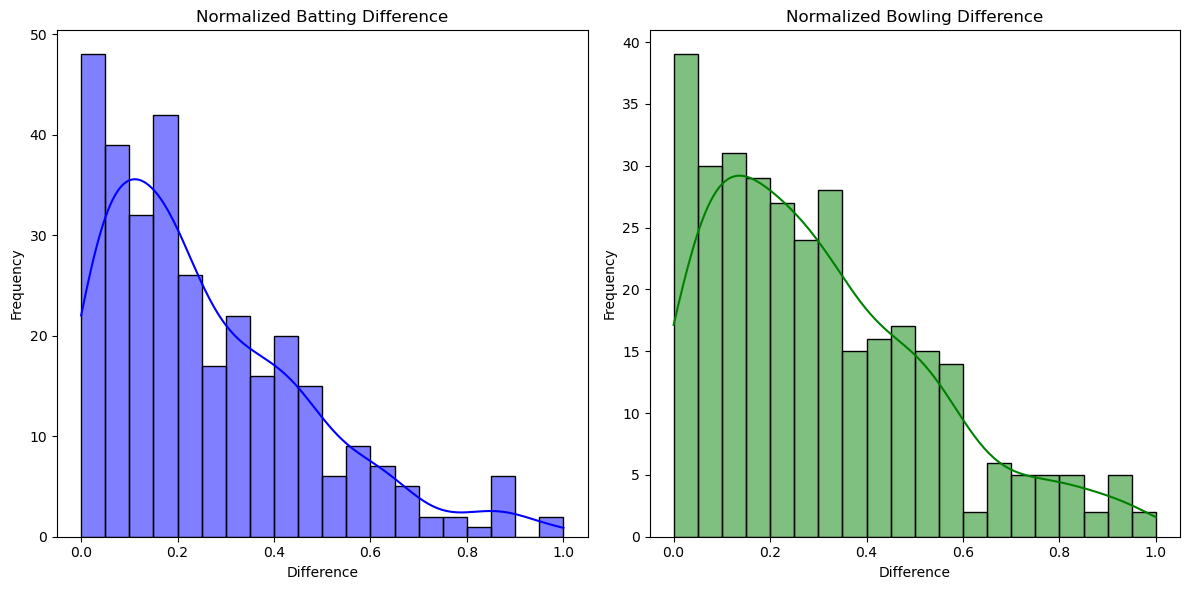

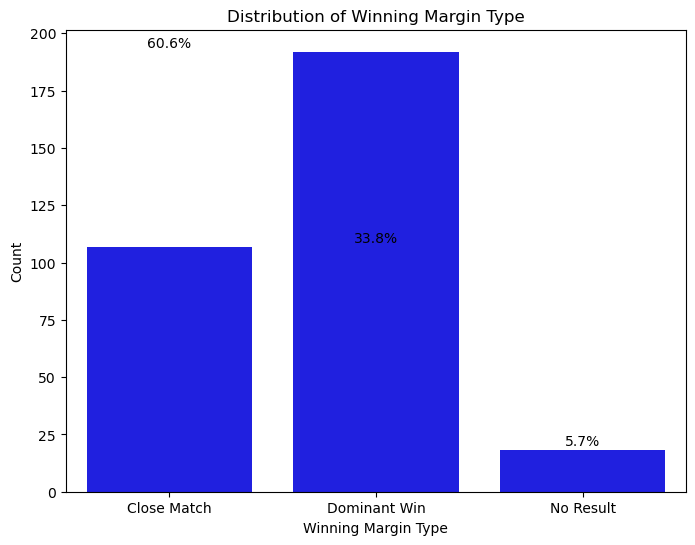

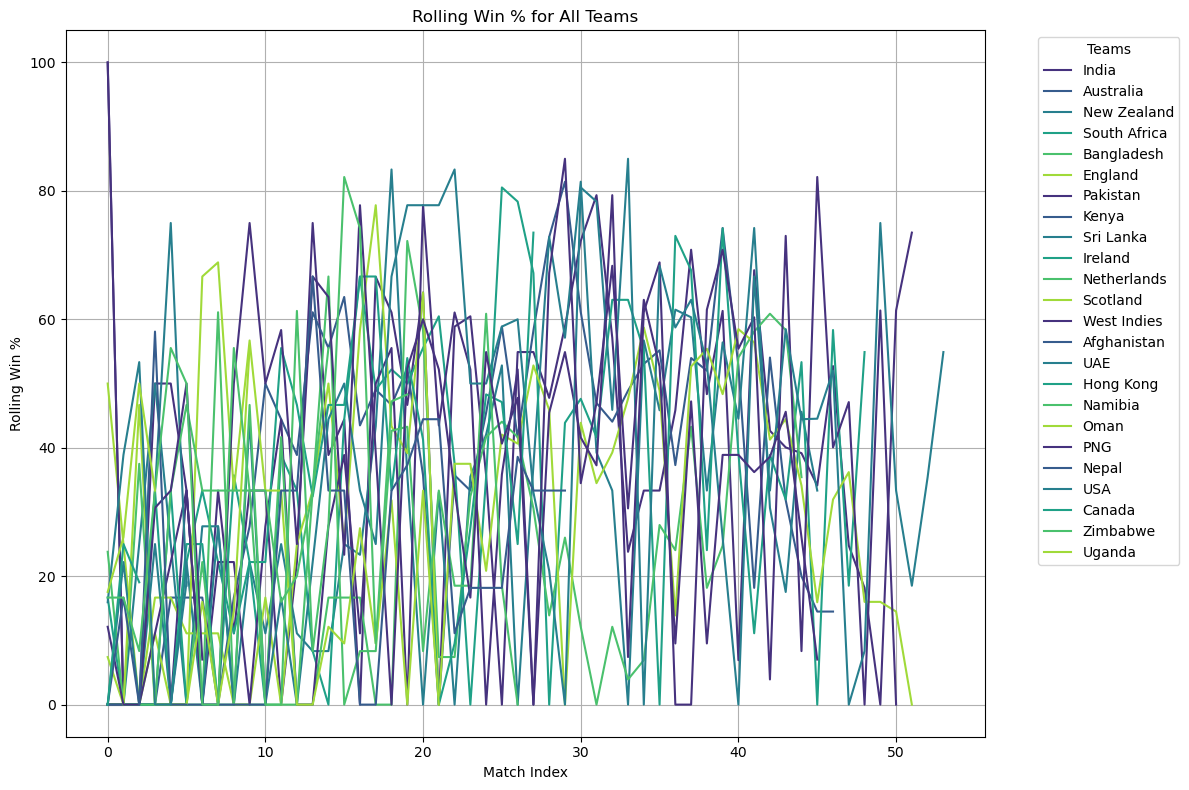

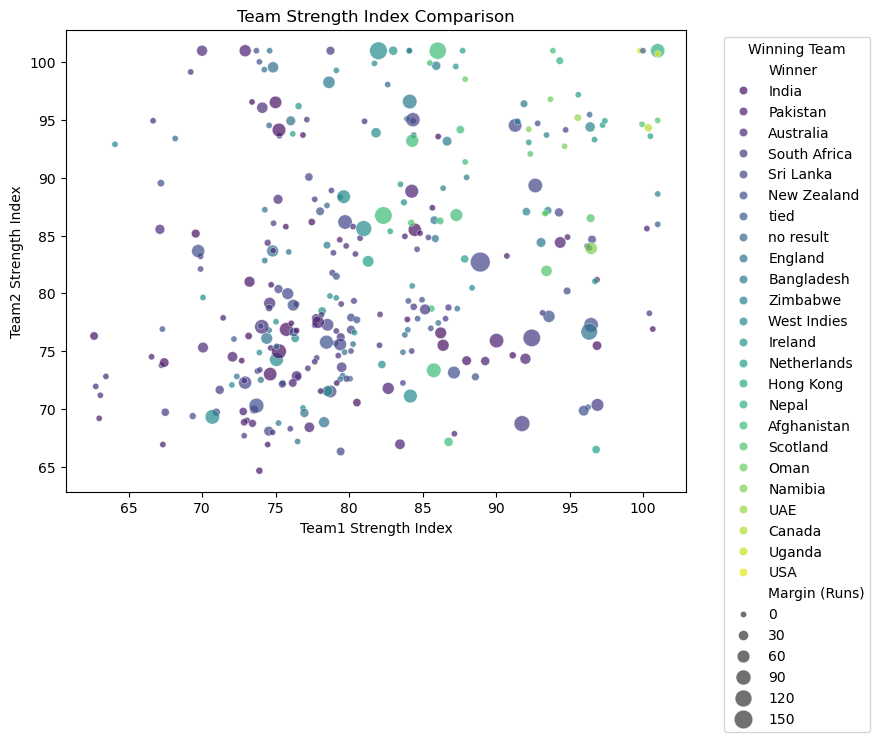

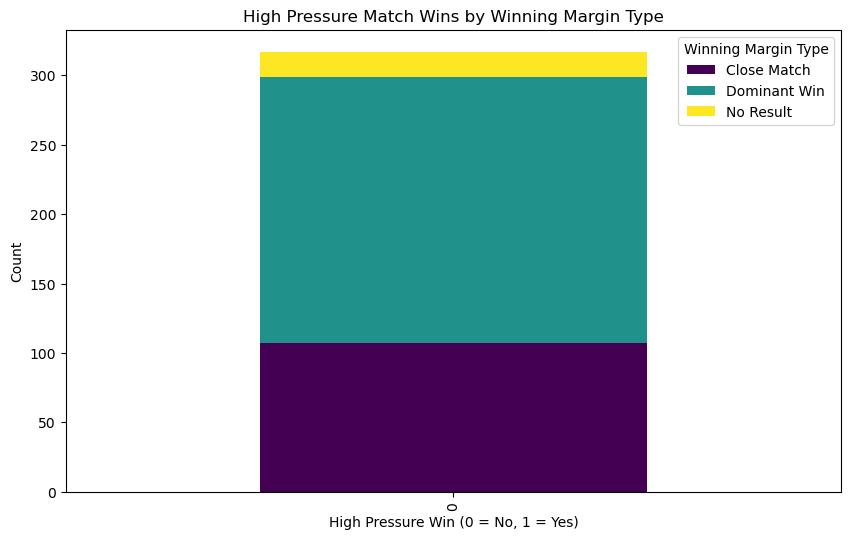

In [46]:
# Set the Viridis color palette
sns.set_palette("viridis")

# 1. Normalized Ranking Differences (Separate Subplots)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(updated_wc_final_data_df['Normalized Batting Difference'], kde=True, color="blue", bins=20)
plt.title("Normalized Batting Difference")
plt.xlabel("Difference")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(updated_wc_final_data_df['Normalized Bowling Difference'], kde=True, color="green", bins=20)
plt.title("Normalized Bowling Difference")
plt.xlabel("Difference")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# 2. Distribution of Winning Margin Type
plt.figure(figsize=(8, 6))
sns.countplot(
    data=updated_wc_final_data_df,
    x='Winning Margin Type',
    color="blue"  # Assign a single color or omit the palette
)
plt.title("Distribution of Winning Margin Type")
plt.xlabel("Winning Margin Type")
plt.ylabel("Count")

# Add percentages
winning_margin_counts = updated_wc_final_data_df['Winning Margin Type'].value_counts()
for index, value in enumerate(winning_margin_counts):
    plt.text(index, value + 2, f"{value / winning_margin_counts.sum() * 100:.1f}%", ha='center')

plt.show()

# 3. Rolling Win % for All Teams (Trend Plot)
plt.figure(figsize=(12, 8))

# Extract unique teams and analyze their rolling performance
unique_teams = pd.concat([updated_wc_final_data_df['Team1'], updated_wc_final_data_df['Team2']]).unique()

for team in unique_teams:
    team_data = updated_wc_final_data_df[
        (updated_wc_final_data_df['Team1'] == team) | (updated_wc_final_data_df['Team2'] == team)
    ]
    # Ensure proper alignment by using the match index as x-axis
    plt.plot(
        range(len(team_data)),  # Match indices for x-axis
        team_data['Rolling Win %'].fillna(0), label=team
    )

plt.title("Rolling Win % for All Teams")
plt.xlabel("Match Index")
plt.ylabel("Rolling Win %")
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.grid(True)
plt.tight_layout()
plt.show()


# 4. Strength Index Comparison (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Team1 Strength Index', y='Team2 Strength Index',
    hue='Winner', size='Margin (Runs)', sizes=(20, 200),
    data=updated_wc_final_data_df, alpha=0.7, palette='viridis'
)
plt.title("Team Strength Index Comparison")
plt.xlabel("Team1 Strength Index")
plt.ylabel("Team2 Strength Index")
plt.legend(title="Winning Team", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5. High Pressure Match Wins (Stacked Bar Plot)
high_pressure_counts = updated_wc_final_data_df.groupby(['High Pressure Win', 'Winning Margin Type']).size().unstack()
high_pressure_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("High Pressure Match Wins by Winning Margin Type")
plt.xlabel("High Pressure Win (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Winning Margin Type")
plt.show()


# 🐻🐻

## Data Visualization Insights

### 1. Normalized Ranking Differences Plot

**Description:**
- Separate histograms for Normalized Batting and Bowling Differences (0-1 scale)

**Insights:**
- Batting Difference:
  - Shows disparity in batting capabilities between Team1 and Team2
  - Narrow distribution suggests minimal batting differences in most matches
- Bowling Difference:
  - Highlights disparity in bowling capabilities
  - Wider distribution may indicate varying bowling strengths across teams
- Larger disparities may predict competitive advantage and match outcomes

### 2. Distribution of Winning Margin Type

**Plot Description:**
- Bar plot showing counts of match results:
  - Dominant Win: Decisive victory (large margins)
  - Close Match: Narrow victory
  - No Result: Inconclusive outcome

**Insights:**
- Reveals frequency of dominant vs. close matches
- High frequency of dominant wins suggests strong team mismatches
- Higher proportion of close matches indicates balanced competition
- Helps understand overall competitiveness in the dataset

### 3. Rolling Win % by Teams

**Plot Description:**
- Line plot tracking Team1's rolling win percentage over matches

**Insights:**
- Shows Team1's performance trends over time:
  - Upward trends: Improving performance
  - Downward trends: Performance decline
  - Flat lines: Consistent performance
- Identifies strong and weak periods for individual teams
- Useful for analyzing team momentum

### 4. Strength Index Comparison

**Plot Description:**
- Scatter plot comparing Team1 and Team2 Strength Indices, colored by match outcomes

**Insights:**
- Strength Index combines batting and bowling rankings
- Higher indices correlate with better team performance
- Team1 wins tend to have higher strength indices compared to Team2
- Clustered data points may indicate balanced matches
- Highlights impact of relative team strengths on match outcomes

### 5. High Pressure Match Wins

**Plot Description:**
- Stacked bar plot showing High Pressure Wins vs. Winning Margin Types

**Insights:**
- High-pressure matches often result in dominant wins
- Reflects teams' ability to perform under pressure
- Proportion of close matches in high-pressure games indicates competitive edge
- Provides insights into team performance during crucial games

# 🐻🐻

# Modeling 


### Detailed Description of the Modeling Code and Model Selection

This section of the code implements machine learning to predict the outcomes of T20 cricket matches using three models: **Logistic Regression**, **Random Forest**, and **XGBoost**. The modeling code is integrated into the `.py` file (using VS Code) and is available in the corresponding [GitHub repository](https://github.com/Shamsvi/Streamlit_Mens_T-20_Cricket_WorldCup_2007-2024). Here's an explanation of the process, the reasoning behind the model choices, and why **XGBoost** stands out.

---

### **Why These Three Models?**
1. **Logistic Regression**  
   Logistic Regression is a simple, interpretable linear model that works well on datasets with linear relationships between the features and the target variable. It's used as a baseline model to evaluate how more complex models perform in comparison.  
   - **Advantages**:  
     - Easy to interpret.
     - Efficient on small to medium-sized datasets.  
   - **Limitations**:  
     - Struggles with non-linear relationships and multi-class classification problems like ours.

2. **Random Forest**  
   Random Forest is a robust ensemble learning method that combines multiple decision trees to make predictions. It handles complex, non-linear relationships and noisy datasets effectively.  
   - **Advantages**:  
     - Reduces overfitting through ensembling.
     - Handles multi-class problems well.
     - Provides feature importance scores for interpretability.  
   - **Limitations**:  
     - Can become computationally expensive for large datasets.

3. **XGBoost (Extreme Gradient Boosting)**  
   XGBoost is an advanced gradient-boosting algorithm known for its speed and accuracy. It iteratively builds decision trees, focusing on correcting the errors of the previous iterations, and incorporates regularization to avoid overfitting.  
   - **Advantages**:  
     - High performance on large, complex datasets.
     - Captures intricate patterns in data.
     - Flexible with parameters for fine-tuning.  
   - **Limitations**:  
     - Requires careful parameter tuning.
     - Computationally intensive.

---

### **Code Explanation**
1. **Integration**  
   The modeling code resides in the `.py` file, ensuring smooth integration with the interactive Streamlit application. It leverages pre-trained models for consistency and efficiency.

2. **Loading Pre-Trained Models**  
   Models are dynamically loaded from URLs to ensure reproducibility. This allows the integration of pre-trained models without having to re-train them locally, saving time and resources.

3. **Preprocessing**  
   The preprocessing function ensures data quality and prepares it for modeling:  
   - Missing features are imputed with default values.
   - Classes with fewer occurrences are removed to ensure the model trains on meaningful data.
   - The target variable is encoded using `LabelEncoder`, and data imbalance is addressed with `RandomOverSampler`.

4. **Model Training and Evaluation**  
   - Data is split into training and test sets.  
   - Models are evaluated using metrics like accuracy, precision, recall, and F1-score. A confusion matrix is generated for a detailed view of misclassifications.  
   - Each model's performance is displayed along with an interactive confusion matrix for in-depth analysis.

5. **Model Selection**  
   Based on the F1-score, **XGBoost** emerges as the top-performing model. The F1-score is particularly valuable for imbalanced datasets, balancing precision and recall to provide a comprehensive view of performance.

---

### **Why Choose XGBoost?**
In this case, **XGBoost** was chosen as the best model because:  
- It outperformed Logistic Regression and Random Forest in accuracy and F1-score.  
- Its ability to capture complex relationships in the dataset made it ideal for predicting match outcomes where multiple interacting factors, like team strength and performance history, play a role.  
- Regularization in XGBoost prevents overfitting, making it robust for both training and unseen data.

---

### **Conclusion**
This modeling approach highlights the strengths of each model while clearly demonstrating why **XGBoost** is the superior choice for this dataset. By leveraging its capabilities, we gain deeper insights into match outcomes and build a reliable prediction system for the T20 World Cup. For more details, refer to the `.py` file in the [GitHub repository](https://github.com/Shamsvi/Streamlit_Mens_T-20_Cricket_WorldCup_2007-2024).


# Predictive Analysis

### Forecasting the Next Champions: Detailed Description

This section aims to predict the winner of the ICC Men's T20 World Cup 2026 using historical team statistics and advanced modeling techniques. The code leverages feature engineering, a Random Forest model, and a simulation-based approach to provide detailed predictions of match outcomes and identify the most likely champion. The predictive analysis code is integrated into the .py file (using VS Code) and is available in the corresponding [GitHub repository](https://github.com/Shamsvi/Streamlit_Mens_T-20_Cricket_WorldCup_2007-2024).

---

### **Feature Engineering**
The dataset is enriched with advanced statistical metrics to capture historical performance trends and team strengths:
1. **Home Advantage**: Teams are given a boost if they play matches in their home grounds, reflecting the psychological and environmental benefits.
2. **Rolling Metrics**:
   - **Rolling Win %**: A moving average of win percentages over recent matches.
   - **Rolling Margins**: Average run and wicket margins from the last few games.
3. **Disparity Metrics**:
   - **Batting Disparity**: The difference in average batting rankings between two teams.
   - **Bowling Disparity**: The difference in average bowling rankings between two teams.

These engineered features allow the model to understand performance trends and identify potential competitive advantages or disadvantages.

---

### **Simulating Matchups**
To predict the overall champion, the code simulates a round-robin tournament where every team faces every other team:
- Historical statistics are aggregated for each team.
- For every simulated match, relative differences in team metrics are calculated, providing the model with a comparative view of team strengths.

---

### **Prediction Model**
 **Model Selection and Decision**

While XGBoost emerged as the best-performing model during evaluation, achieving the highest accuracy and F1-score, we noticed a critical issue during prediction. Its predictions for this specific task occasionally deviated from realistic outcomes, producing results that were inconsistent with historical trends and team performance metrics. This raised concerns about potential overfitting or sensitivity to certain features in the dataset.

To address this, we decided to use the **Random Forest Classifier** for the prediction task in this section. Our reasons include:

- **Stable Predictions**: Random Forest provided realistic and plausible outcomes grounded in historical trends.
- **Ease of Interpretation**: Its results were straightforward to understand and explain, particularly for non-technical users.
- **Robustness**: It avoided extreme or implausible predictions, offering a more balanced and reliable forecasting experience.

This decision underscores our commitment to delivering both technically sound and user-friendly results. By choosing a model that prioritizes stability and interpretability, we aim to provide credible insights while ensuring an engaging experience for cricket enthusiasts exploring the predictions in the Streamlit app.

---

### **Visualization and Insights**
The predicted win counts for each team are visualized in a **bar chart**, showing:
- The total number of predicted wins for each team in the simulated tournament.
- The likely champion, determined by the highest number of wins.

The visualization provides an interactive and intuitive way to explore the predictions, making it accessible even to users unfamiliar with machine learning.

---

### **Key Takeaways**
1. **Detailed Analysis**: By incorporating rolling averages, home advantage, and ranking disparities, the model captures the multifaceted nature of cricket performance.
2. **Simulation-Based Predictions**: The round-robin simulation ensures that the predictions are comprehensive and account for potential matchups.
3. **Most Likely Winner**: The team with the highest predicted wins is highlighted, giving users actionable insights into the potential champion.

The code integrates the prediction system into the Streamlit app, providing users with an engaging way to explore predictions and insights. This approach combines advanced analytics with user-friendly visualization, making it a powerful tool for cricket enthusiasts and analysts alike.
